# Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

from sklearn.linear_model import LinearRegression,SGDRegressor, PoissonRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics

import pickle 
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

Loading the datasets

In [2]:
dataset_1=pd.read_excel('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/Country-Code.xlsx')

In [3]:
dataset_2=pd.read_csv('https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Z_Restaurant/zomato.csv',encoding='latin1')

Creating dataframes

In [4]:
df=pd.DataFrame(data=dataset_2)
df_countrycode=pd.DataFrame(data=dataset_1)

Checking the dataframes

In [5]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [6]:
df_countrycode

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


Combining the 2 dataframes

In [7]:
country_code_dict=dict(zip(df_countrycode['Country Code'],df_countrycode['Country']))
df['Country']=df['Country Code'].map(country_code_dict)

Checking the revise dataframe

In [8]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


Checking the head of the dataset

In [9]:
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,1000,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677,Phillipines
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",6000,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


Checking the tail of the dataset

In [10]:
df.tail(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9541,5905215,Emirgan Sí_tiô,208,ÛÁstanbul,"Emirgan Mahallesi, SakÛ±p SabancÛ± Caddesi, No...",Emirgí¢n,"Emirgí¢n, ÛÁstanbul",29.056620,41.104969,"Restaurant Cafe, Turkish, Desserts",75,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,877,Turkey
9542,5926979,Leman Kí_ltí_r,208,ÛÁstanbul,"CaferaÛôa Mahallesi, Neôet í_mer Sokak, No 9/...",KadÛ±kí_y Merkez,"KadÛ±kí_y Merkez, ÛÁstanbul",29.022805,40.989705,Restaurant Cafe,80,Turkish Lira(TL),No,No,No,No,3,3.7,Yellow,Good,506,Turkey
9543,5916085,Dem Karakí_y,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, Hoca Ta...",Karakí_y,"Karakí_y, ÛÁstanbul",28.978237,41.024633,Cafe,35,Turkish Lira(TL),No,No,No,No,2,4.5,Dark Green,Excellent,761,Turkey
9544,5915547,Karakí_y Gí_llí_oÛôlu,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977636,41.022904,"Desserts, Bí_rek",40,Turkish Lira(TL),No,No,No,No,2,4.7,Dark Green,Excellent,1305,Turkey
9545,5915054,Baltazar,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, KÛ±lÛ±í...",Karakí_y,"Karakí_y, ÛÁstanbul",28.981103,41.025785,"Burger, Izgara",90,Turkish Lira(TL),No,No,No,No,3,4.3,Green,Very Good,870,Turkey
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,55,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591,Turkey


Checking the shape

In [11]:
df.shape

(9551, 22)

- The dataset has 9551 rows and 22 columns.

Checking the number of unique values in Average Cost for two and Price range

In [12]:
df['Average Cost for two'].nunique()

140

- We can observe that 140 categories of unique value present.

In [13]:
df['Price range'].nunique()

4

- We can observe that 4 categories of unique value present. 

Checking the info of the dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

- We can observe 3 types of datatypes present in the dataset i.e Object, Integer, Float.
- From initial look we can observe that columns Restaurant ID, Restaurant Name, Address, Longitude and Latitude plays no important role in prediction. Hence we can drop it after further analysis.
- The column Locality Verbose is the combination of column Locality and City. Hence we can drop it.
- There are 3 float type, 5 integer and 14 object columns present in the dataset.
- We can observe that only Cuisines column has null values present.
- We need to predict Average Cost for two and Price range from the dataset. Hence Average Cost for two and Price range are the target columns.
- We have observed that the column Average Cost for two has 140 unique values and is of integer type. Hence we will build a regression model to predict Average Cost for two.
- The Price range has 4 unique values. Hence we will build a classification model to predict Price range.

Checking for null values

In [15]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

- We can observe that Cuisines has null values in 9 rows.

Checking for empty data 

In [16]:
empty_space=(df==' ').sum()
empty_space

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

- There are no empty space in dataset.

Checking the null value rows

In [17]:
null_rows=df[df['Cuisines'].isna()]
null_rows

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,34,United States
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,36,United States
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160,United States
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209,United States
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102,United States
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,11,United States
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158,United States
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707,United States
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309,United States


- We can observe that all the null values are from country United States. 
- Also out of 9 rows, 3 rows has 0 value in Average Cost for two.
- Hence we can remove remove these 9 rows.

In [18]:
df.dropna(inplace=True)

Dropping Restaurant ID, Restaurant Name, Locality Verbose and address columns

In [19]:
df.drop('Restaurant ID',axis=1,inplace=True)
df.drop('Restaurant Name',axis=1,inplace=True)
df.drop('Locality Verbose',axis=1,inplace=True)
df.drop('Address',axis=1,inplace=True)

Checking unique values in Currency

In [20]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

- The currency names are complete names of the countries currencies.
- Hence we will replace it with short forms.

Replacing currency names

In [21]:
currency_short={
    'Botswana Pula(P)': 'BWP',
    'Brazilian Real(R$)': 'BRL',
    'Dollar($)': 'USD',
    'Emirati Diram(AED)': 'AED',
    'Indian Rupees(Rs.)': 'INR',
    'Indonesian Rupiah(IDR)': 'IDR',
    'NewZealand($)': 'NZD',
    'Pounds(\x8c£)': 'GBP',
    'Qatari Rial(QR)': 'QAR',
    'Rand(R)': 'ZAR',
    'Sri Lankan Rupee(LKR)': 'LKR',
    'Turkish Lira(TL)': 'TRY'
}

df['Currency']=df['Currency'].replace(currency_short)

Checking unique values in Has Table booking

In [22]:
df['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

- There are 2 categories in Has Table booking.

Checking unique values in Has Online delivery

In [23]:
df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

- There are 2 categories in Has Table booking.

Checking unique values in Is delivering now

In [24]:
df['Is delivering now'].unique()

array(['No', 'Yes'], dtype=object)

- There are 2 categories in Has Table booking.

Checking unique values in Switch to order menu

In [25]:
df['Switch to order menu'].unique()

array(['No'], dtype=object)

- Only one category i.e No is present in this column. Hence we can drop the column.

Checking unique values in Rating color

In [26]:
df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

- There are 5 colors present in the dataset.

Checking unique values in Rating text

In [27]:
df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

- There are 5 Rating text present in the dataset.
- The column Rating color and Rating text represents same value. Hence we can drop any one column.
- Since Rating text has better representation hence we can drop Rating color.

Dropping Rating color column

In [28]:
df.drop('Rating color',axis=1,inplace=True)

Checking unique values in Country

In [29]:
df['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

Dropping column Switch to order menu

- Since only one category i.e No is present in this column. Hence we can drop the column.

In [30]:
df.drop('Switch to order menu',axis=1,inplace=True)

Separating each Cuisines into a separate columns

In [31]:
cuisines_split = df['Cuisines'].str.split(', ', expand=True)
cuisines_split.columns = [f'Cuisines{i+1}' for i in range(cuisines_split.shape[1])]
df = pd.concat([df, cuisines_split], axis=1)

Dropping Cuisines column

In [32]:
df.drop('Cuisines',axis=1,inplace=True)

Checking for null values in new columns

In [33]:
df.isnull().sum()

Country Code               0
City                       0
Locality                   0
Longitude                  0
Latitude                   0
Average Cost for two       0
Currency                   0
Has Table booking          0
Has Online delivery        0
Is delivering now          0
Price range                0
Aggregate rating           0
Rating text                0
Votes                      0
Country                    0
Cuisines1                  0
Cuisines2               3394
Cuisines3               6838
Cuisines4               8678
Cuisines5               9262
Cuisines6               9426
Cuisines7               9500
Cuisines8               9528
dtype: int64

- We can observe null values in columns Cuisines2, Cuisines3, Cuisines4, Cuisines5, Cuisines6, Cuisines7 and Cuisines8.
- We will replace the null values with value X

In [34]:
df['Cuisines2'].fillna('X',inplace=True)
df['Cuisines3'].fillna('X',inplace=True)
df['Cuisines4'].fillna('X',inplace=True)
df['Cuisines5'].fillna('X',inplace=True)
df['Cuisines6'].fillna('X',inplace=True)
df['Cuisines7'].fillna('X',inplace=True)
df['Cuisines8'].fillna('X',inplace=True)

Separating numerical and categorical columns

In [35]:
num_columns=[column for column in df.columns if df[column].dtypes!='O']
cat_columns=[column for column in df.columns if df[column].dtypes=='O']

Statistical analysis using describe mothod

In [36]:
df[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Country Code,9542.0,18.179208,56.451600,1.000000,1.000000,1.000000,1.000000,216.000000
Longitude,9542.0,64.274997,41.197602,-157.948486,77.081565,77.192031,77.282043,174.832089
Latitude,9542.0,25.848532,11.010094,-41.330428,28.478658,28.570444,28.642711,55.976980
Average Cost for two,9542.0,1200.326137,16128.743876,0.000000,250.000000,400.000000,700.000000,800000.000000
Price range,9542.0,1.804968,0.905563,1.000000,1.000000,2.000000,2.000000,4.000000
Aggregate rating,9542.0,2.665238,1.516588,0.000000,2.500000,3.200000,3.700000,4.900000
Votes,9542.0,156.772060,430.203324,0.000000,5.000000,31.000000,130.000000,10934.000000


- Column Average Cost for two is highly right skewed as mean is greater than median. 
- In Aggregate rating column median is greater than mean. Hence the column is left skewed.
- In Votes column mean is greater than median. Hence the column is right skewed.
- Presence of outliers can be obderved in Average Cost for two column as the difference between max and 75 percentile is very high.
- Column Votes also has outliers present.

In [37]:
df[cat_columns].describe().T

,count,unique,top,freq
City,9542,140,New Delhi,5473
Locality,9542,1206,Connaught Place,122
Currency,9542,12,INR,8652
Has Table booking,9542,2,No,8384
Has Online delivery,9542,2,No,7091
Is delivering now,9542,2,No,9508
Rating text,9542,6,Average,3734
Country,9542,15,India,8652
Cuisines1,9542,119,North Indian,2992
Cuisines2,9542,117,X,3394


- In city column there are total 140 unique values. New Delhi has the highest frequency with 5473 counts of occurences.
- Locality column 1206 unique values. Connaught Place has the highest occurence with 122 counts.
- There are 12 currencies in the dataset with INR has the highest count of 8652.
- Columns Has Table booking, Has Online delivery and Is delivering now has 2 categories. No has the highest count in all 3 columns with frequencies 8384, 7091 and 9508 respectively. 
- India has the highest frequency in the dataset with count 8652. There are total 15 countries data present.
- In Cuisines1, North Indian cuisines has the highest count with frequece 119.

#### Data Visualization

Univariate analysis

Visualising numerical columns using hist plot

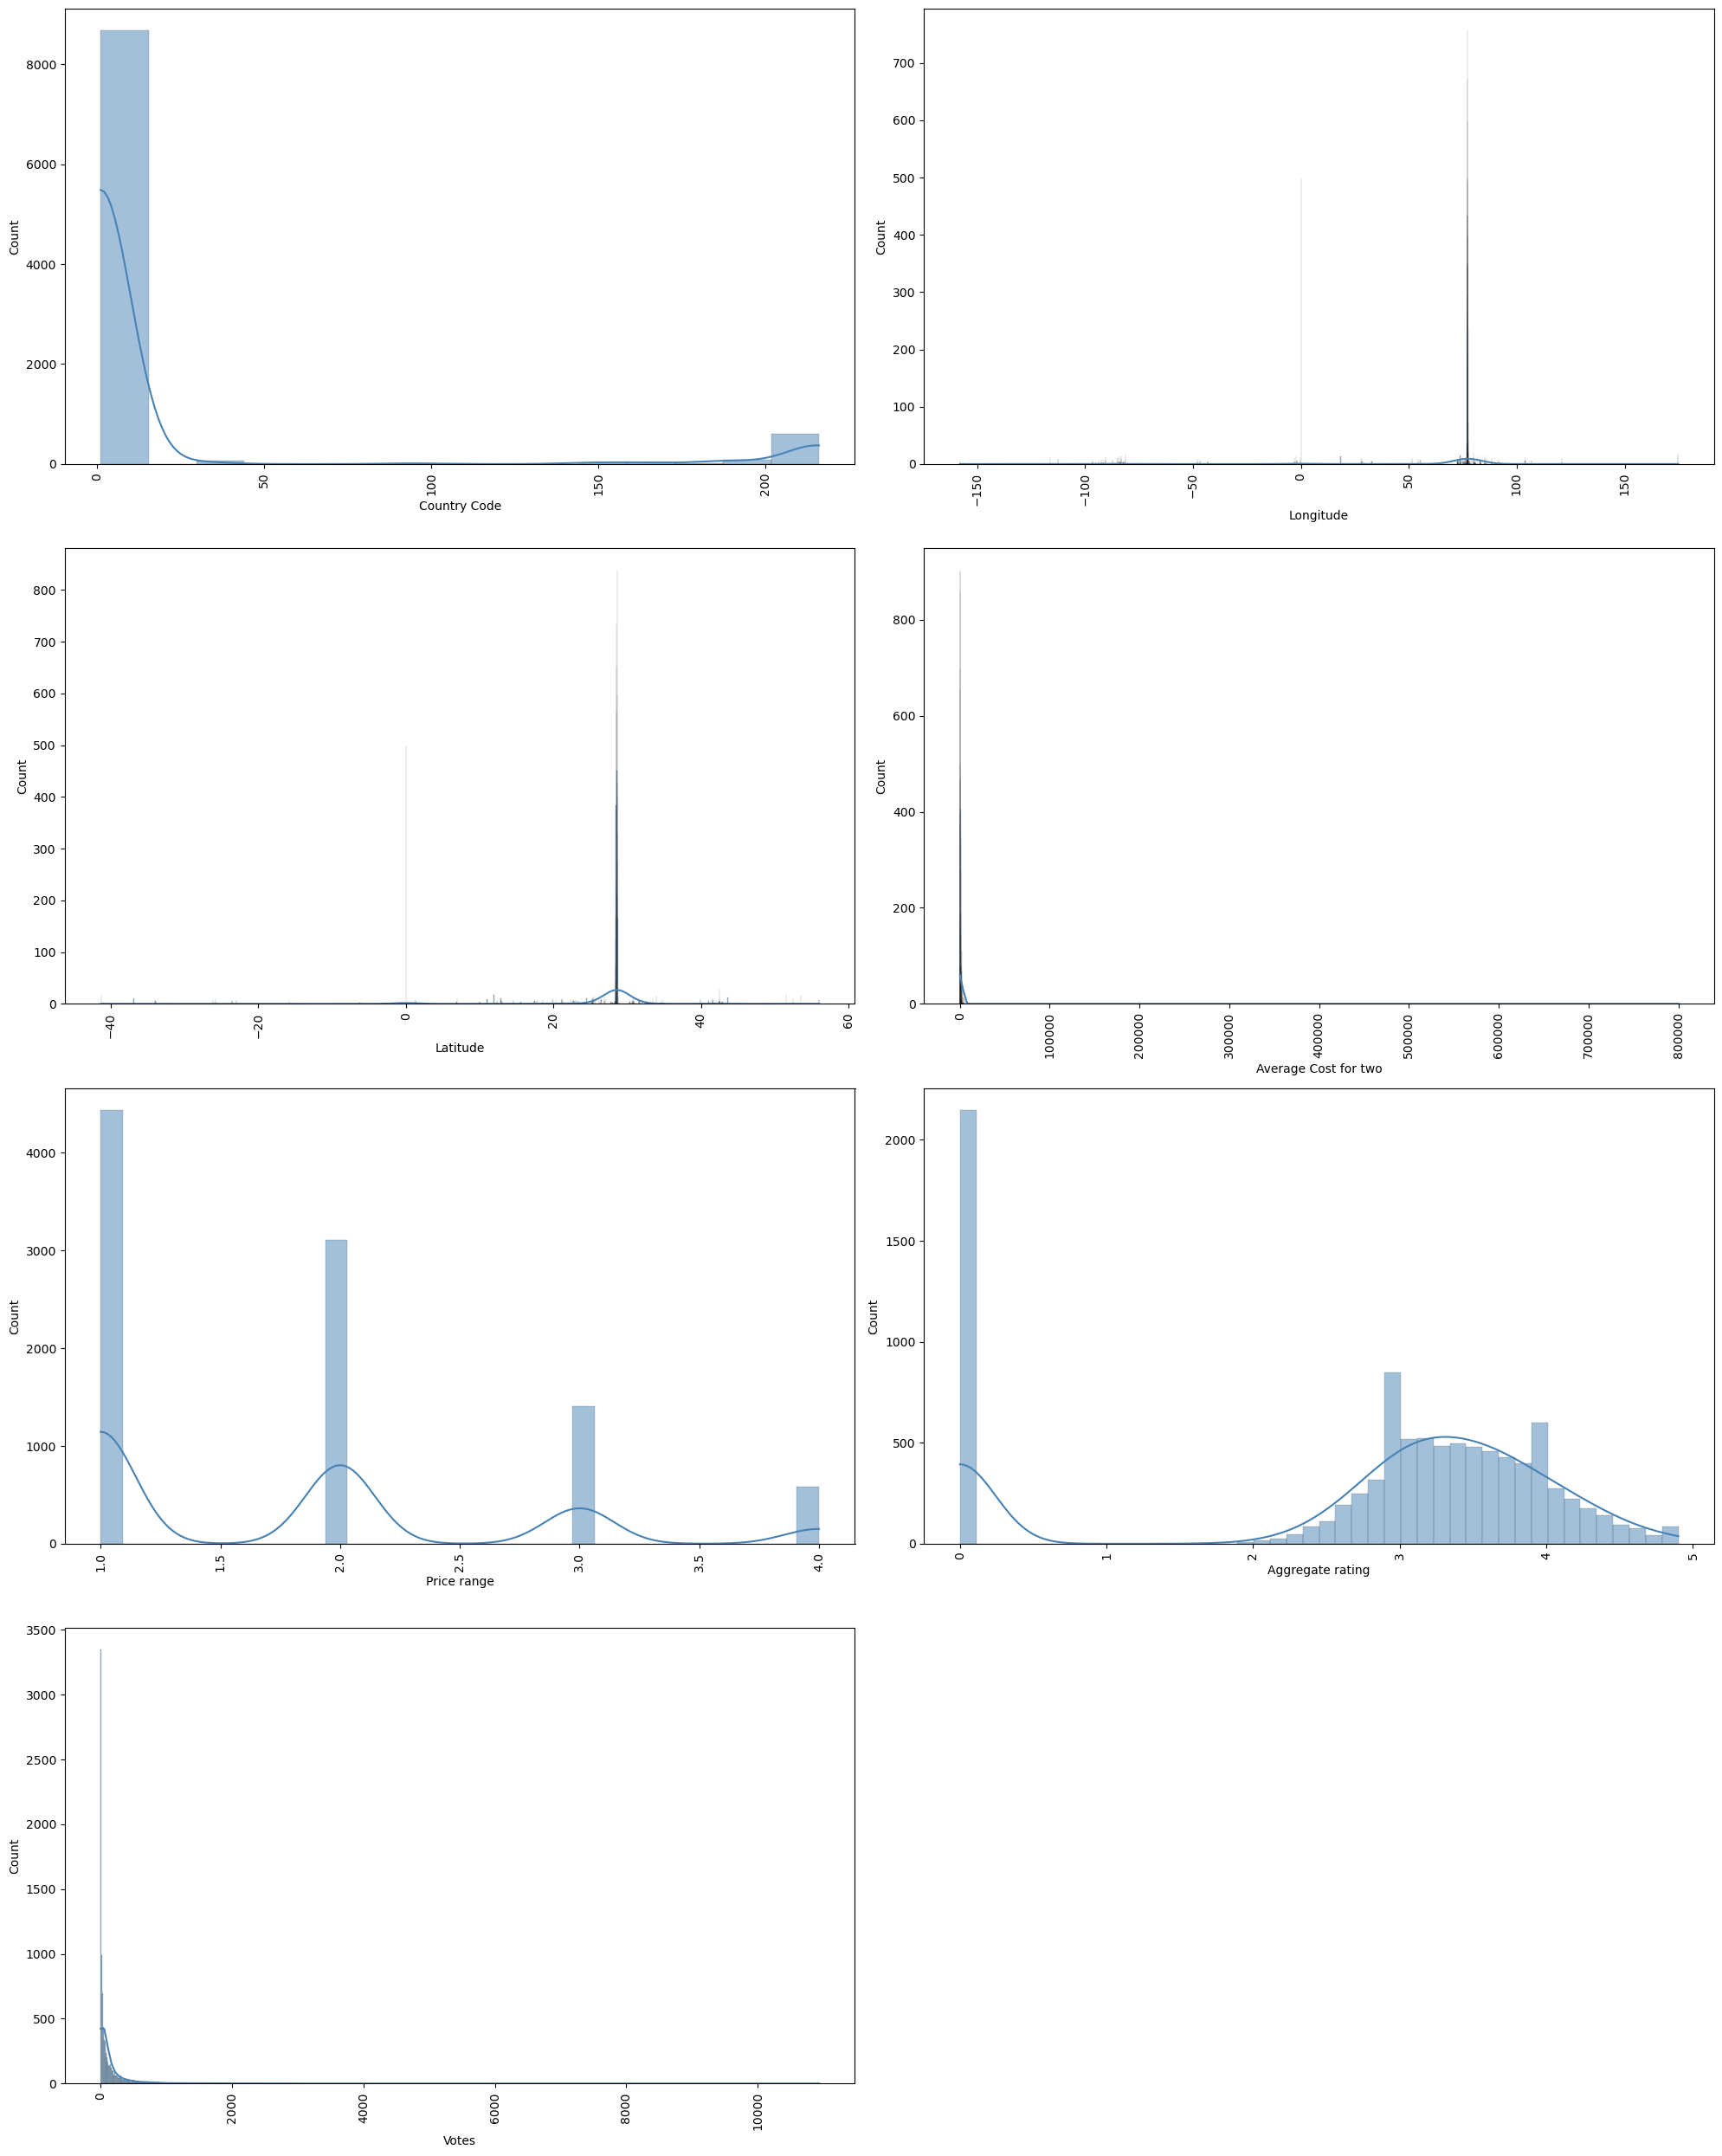

In [38]:
plt.figure(figsize=(20,25))
for index,column in enumerate(num_columns):
    if index<=len(num_columns):
        plt.subplot((len(num_columns)+1)//2,2,index+1)
        sns.histplot(x=column,kde=True,data=df,color='Steelblue',linewidth=.1)
        plt.xlabel(column)
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Column Average cost for two is right skewed.
- Column Aggregate rating is left skewed.
- Column Votes has right skewness present.

Visualising Currency columns using count plot

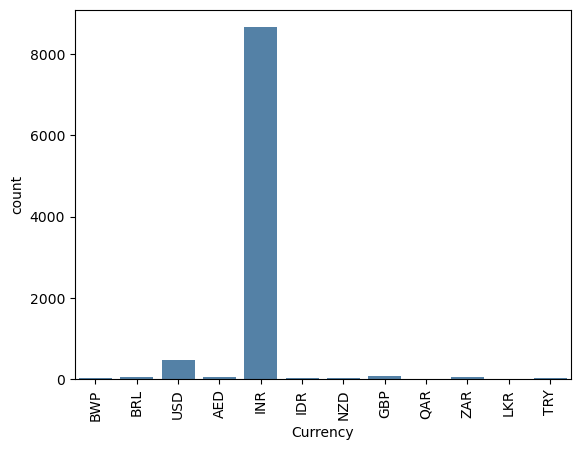

In [39]:
sns.countplot(x='Currency',data=df,color='Steelblue',linewidth=.1)
plt.xlabel('Currency')
plt.xticks(rotation=90)
plt.show()

- Most of the currency in the dataset is of INR. There are other currencies however the count is very low.

Visualising Has Table booking columns using count plot

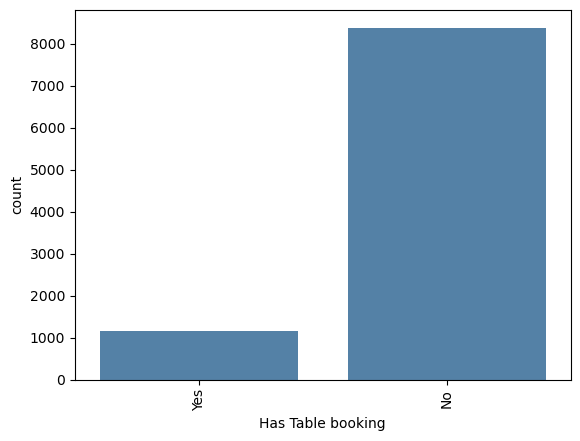

In [40]:
sns.countplot(x='Has Table booking',data=df,color='Steelblue',linewidth=.1)
plt.xlabel('Has Table booking')
plt.xticks(rotation=90)
plt.show()

- Most of the restaurant has no Table booking in advance. A low count of restaurant has advance table booking in the dataset.

Visualising Has Online delivery columns using count plot

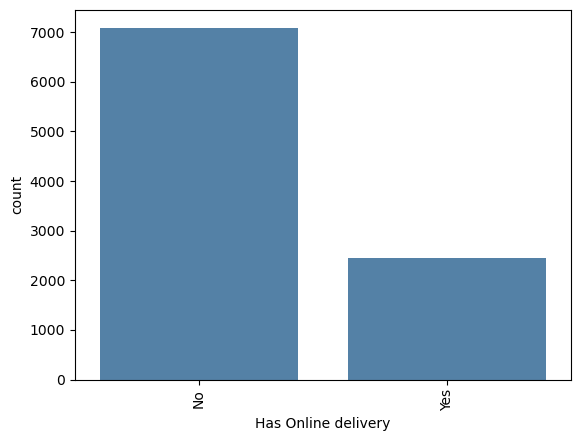

In [41]:
sns.countplot(x='Has Online delivery',data=df,color='Steelblue',linewidth=.1)
plt.xlabel('Has Online delivery')
plt.xticks(rotation=90)
plt.show()

- The count of no online delivery is much higher than Yes to online delivery. 

Visualising Is delivering now columns using count plot

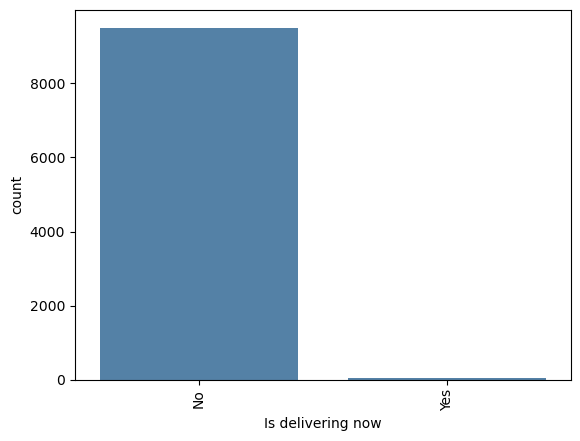

In [42]:
sns.countplot(x='Is delivering now',data=df,color='Steelblue',linewidth=.1)
plt.xlabel('Is delivering now')
plt.xticks(rotation=90)
plt.show()

- Almost all restaurant has no Is delivering now option. A very few restuarant has is delivering now as yes.

Visualising Rating text columns using count plot

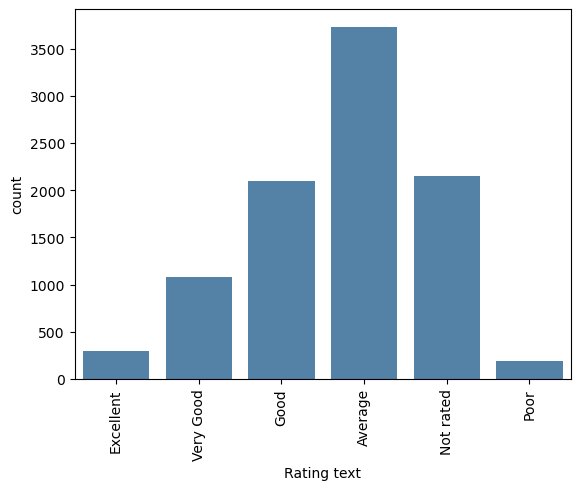

In [43]:
sns.countplot(x='Rating text',data=df,color='Steelblue',linewidth=.1)
plt.xlabel('Rating text')
plt.xticks(rotation=90)
plt.show()

- High count of restaurant has average rating. Count of restaurant with poor rating is lowest. Count of restaurant with excellent rating is also low.  

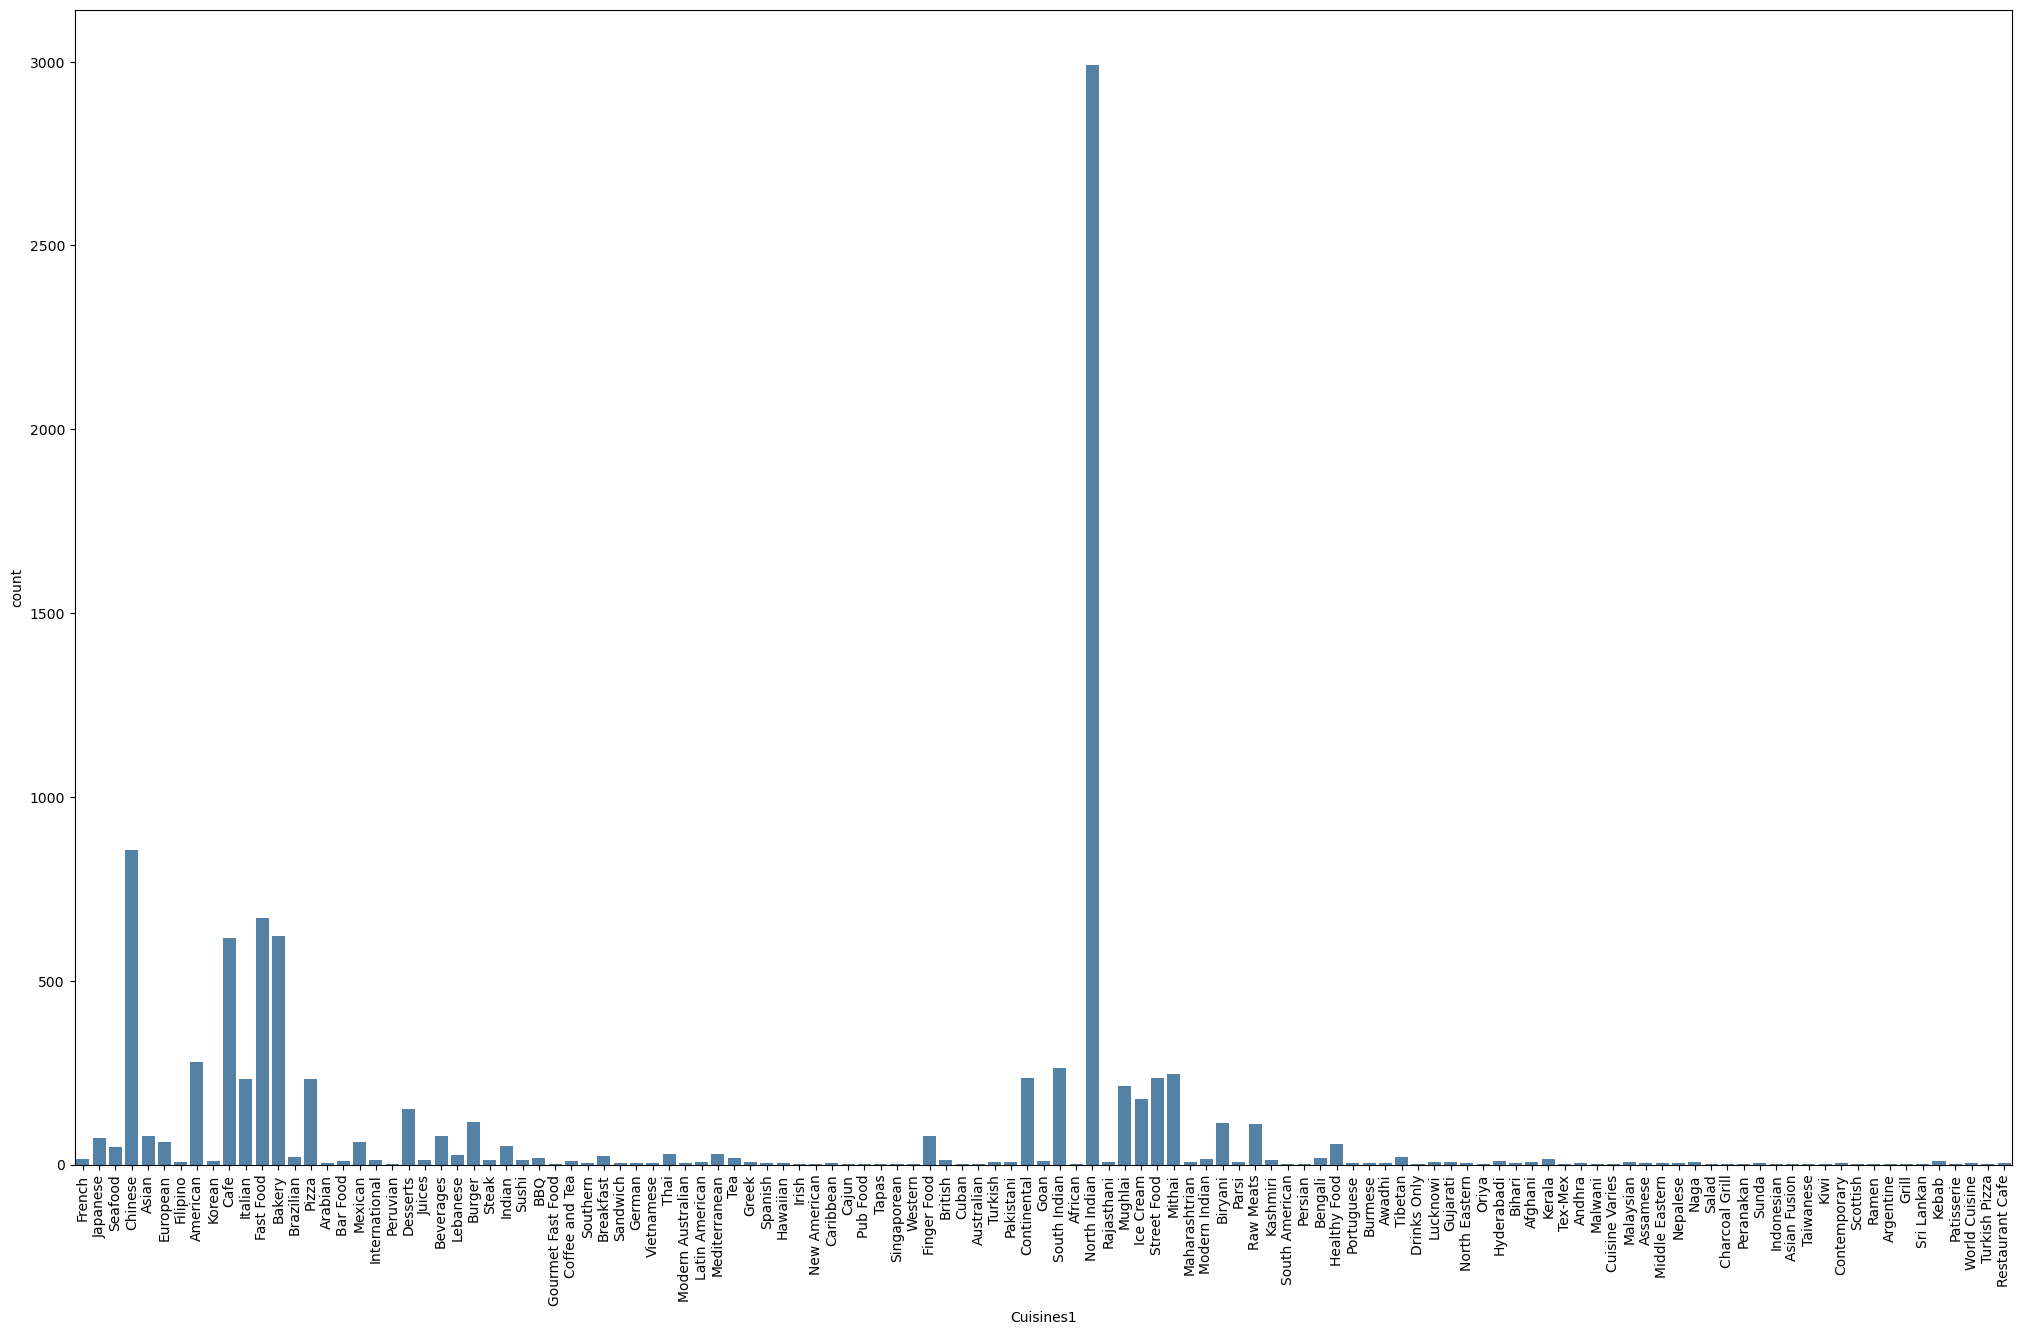

In [44]:
plt.figure(figsize=(25,15))
sns.countplot(x='Cuisines1',data=df,color='Steelblue',linewidth=.1)
plt.xlabel('Cuisines1')
plt.xticks(rotation=90)
plt.show()

- North Indian cuisines has the highest count in the dataset. 
- Chinese, Cafe, Fast Food, and Bakery cuisines are moderately represented in the dataset.
- There are other cuisines in the dataset however the count is low.

Bivariate analysis

Visualising Has Table booking vs Price range using count plot

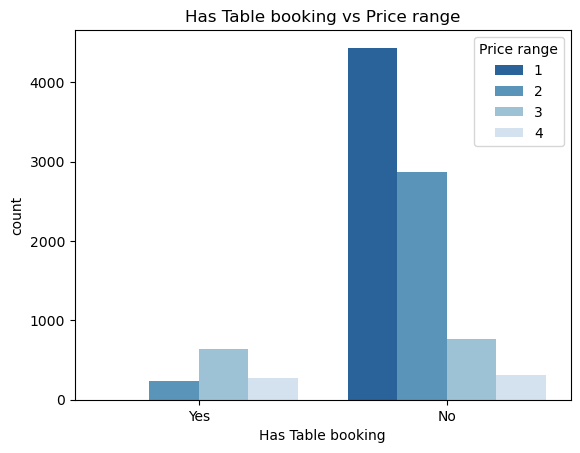

In [45]:
plt.title('Has Table booking vs Price range')
sns.countplot(x='Has Table booking',hue='Price range',data=df,palette='Blues_r',linewidth=.1)
plt.show()

- For no category of Has Table booking, all the 4 price range is available.
- For yes category of Has Table booking only 3 price range is available i.e price range 1 is not present.

Visualising Has Online delivery vs Price range using count plot

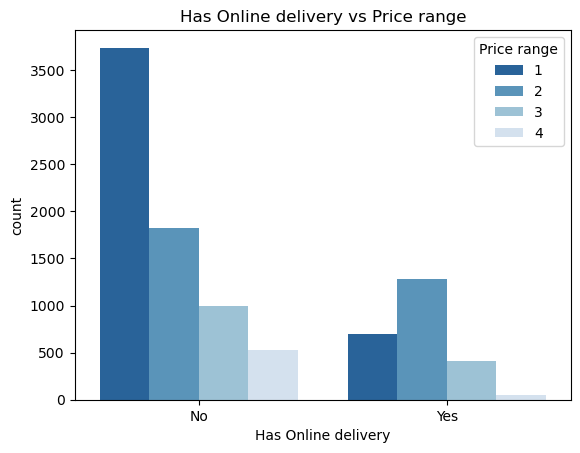

In [46]:
plt.title('Has Online delivery vs Price range')
sns.countplot(x='Has Online delivery',hue='Price range',data=df,palette='Blues_r',linewidth=.1)
plt.show()

- For both Yes and No categories all 4 price is available.
- The count of price range 1 is highest in No category whereas count of price range 2 is highest in Yes category.

Visualising Rating text vs Price range using count plot

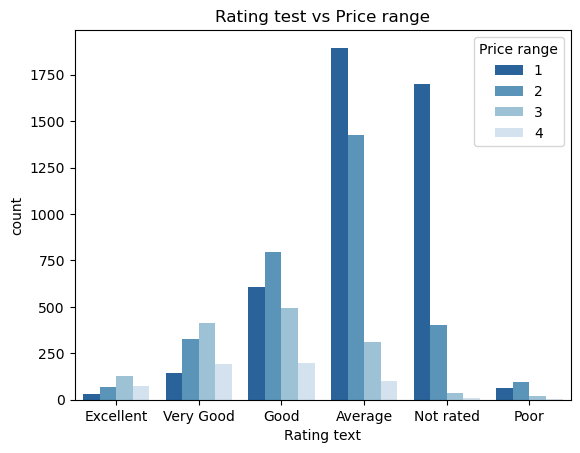

In [47]:
plt.title('Rating test vs Price range')
sns.countplot(x='Rating text',hue='Price range',data=df,palette='Blues_r',linewidth=.1)
plt.show()

- In excellent rating, price range 3 has the highest count.
- In very good rating, price range 3 has the highest count.
- In Good rating, price range 2 has the highest count.
- For average and Not rated, price range 1 has the highest count. 
- In Poor rating onlt 3 price range is present i.e 1, 2, 3. 

Visualize the top 20 location with the highest average cost for two with price range as 4

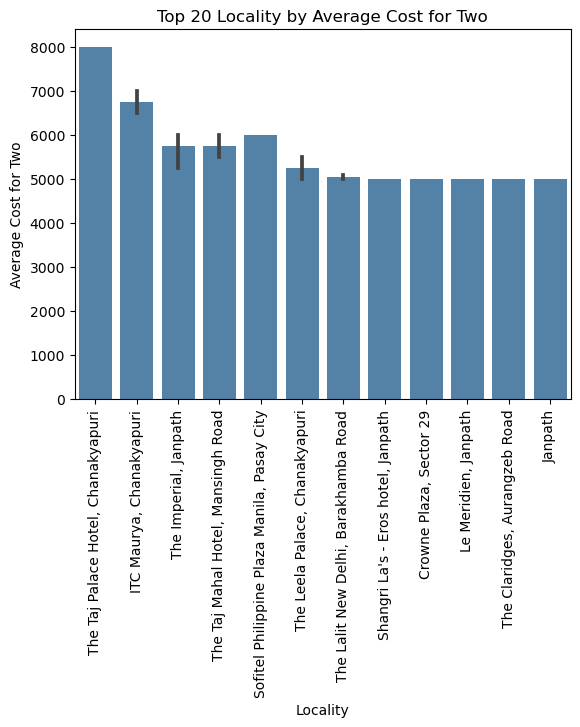

In [48]:
price_range_4=df[df['Price range']==4]
sorted_df=price_range_4.sort_values(by='Average Cost for two',ascending=False).head(20)
top_20_cities=sorted_df.head(20)
sns.barplot(x='Locality',y='Average Cost for two',data=top_20_cities,color='Steelblue',linewidth=.1)
plt.title('Top 20 Locality by Average Cost for Two')
plt.xlabel('Locality')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=90)
plt.show()

- We can observe that there are 12 localities where top 20 Average cost for two is highest. 
- However we observe that since there are difference currency values present and due to difference in currency values top 20 city may vay.

Visualising the mean aggregate rating across different countries using bar plot

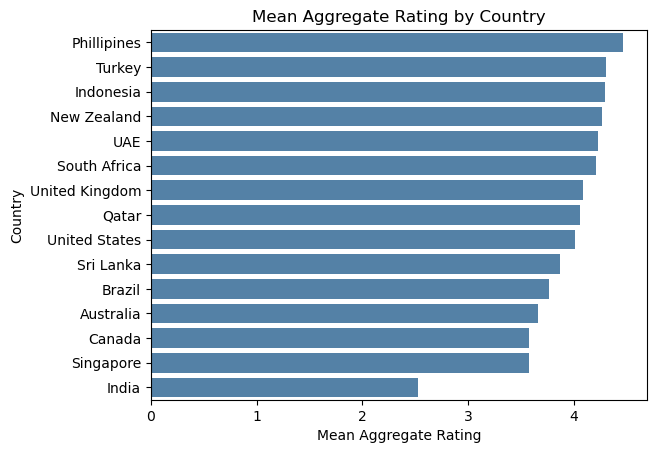

In [49]:
mean_ratings = df.groupby('Country')['Aggregate rating'].mean().reset_index()
mean_ratings = mean_ratings.sort_values(by='Aggregate rating', ascending=False)
sns.barplot(x='Aggregate rating', y='Country', data=mean_ratings, color='Steelblue')
plt.title('Mean Aggregate Rating by Country')
plt.xlabel('Mean Aggregate Rating')
plt.ylabel('Country')
plt.show()

- We can observe that Phollipined has the highest mean Aggregate rating among all countries in the dataset.
- India has the lowest mean Aggregate rating.

Visualising Average Cost for two vs Aggregate rating

<Axes: xlabel='Average Cost for two', ylabel='Aggregate rating'>

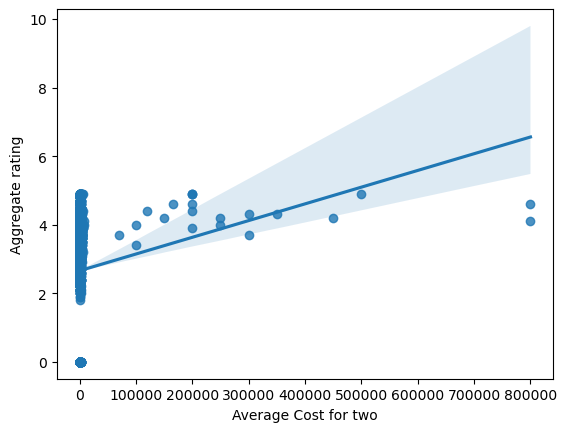

In [50]:
sns.regplot(x='Average Cost for two',y='Aggregate rating',data=df)

- We can observe positve correlation among the 2 columns

Multivariate analysis

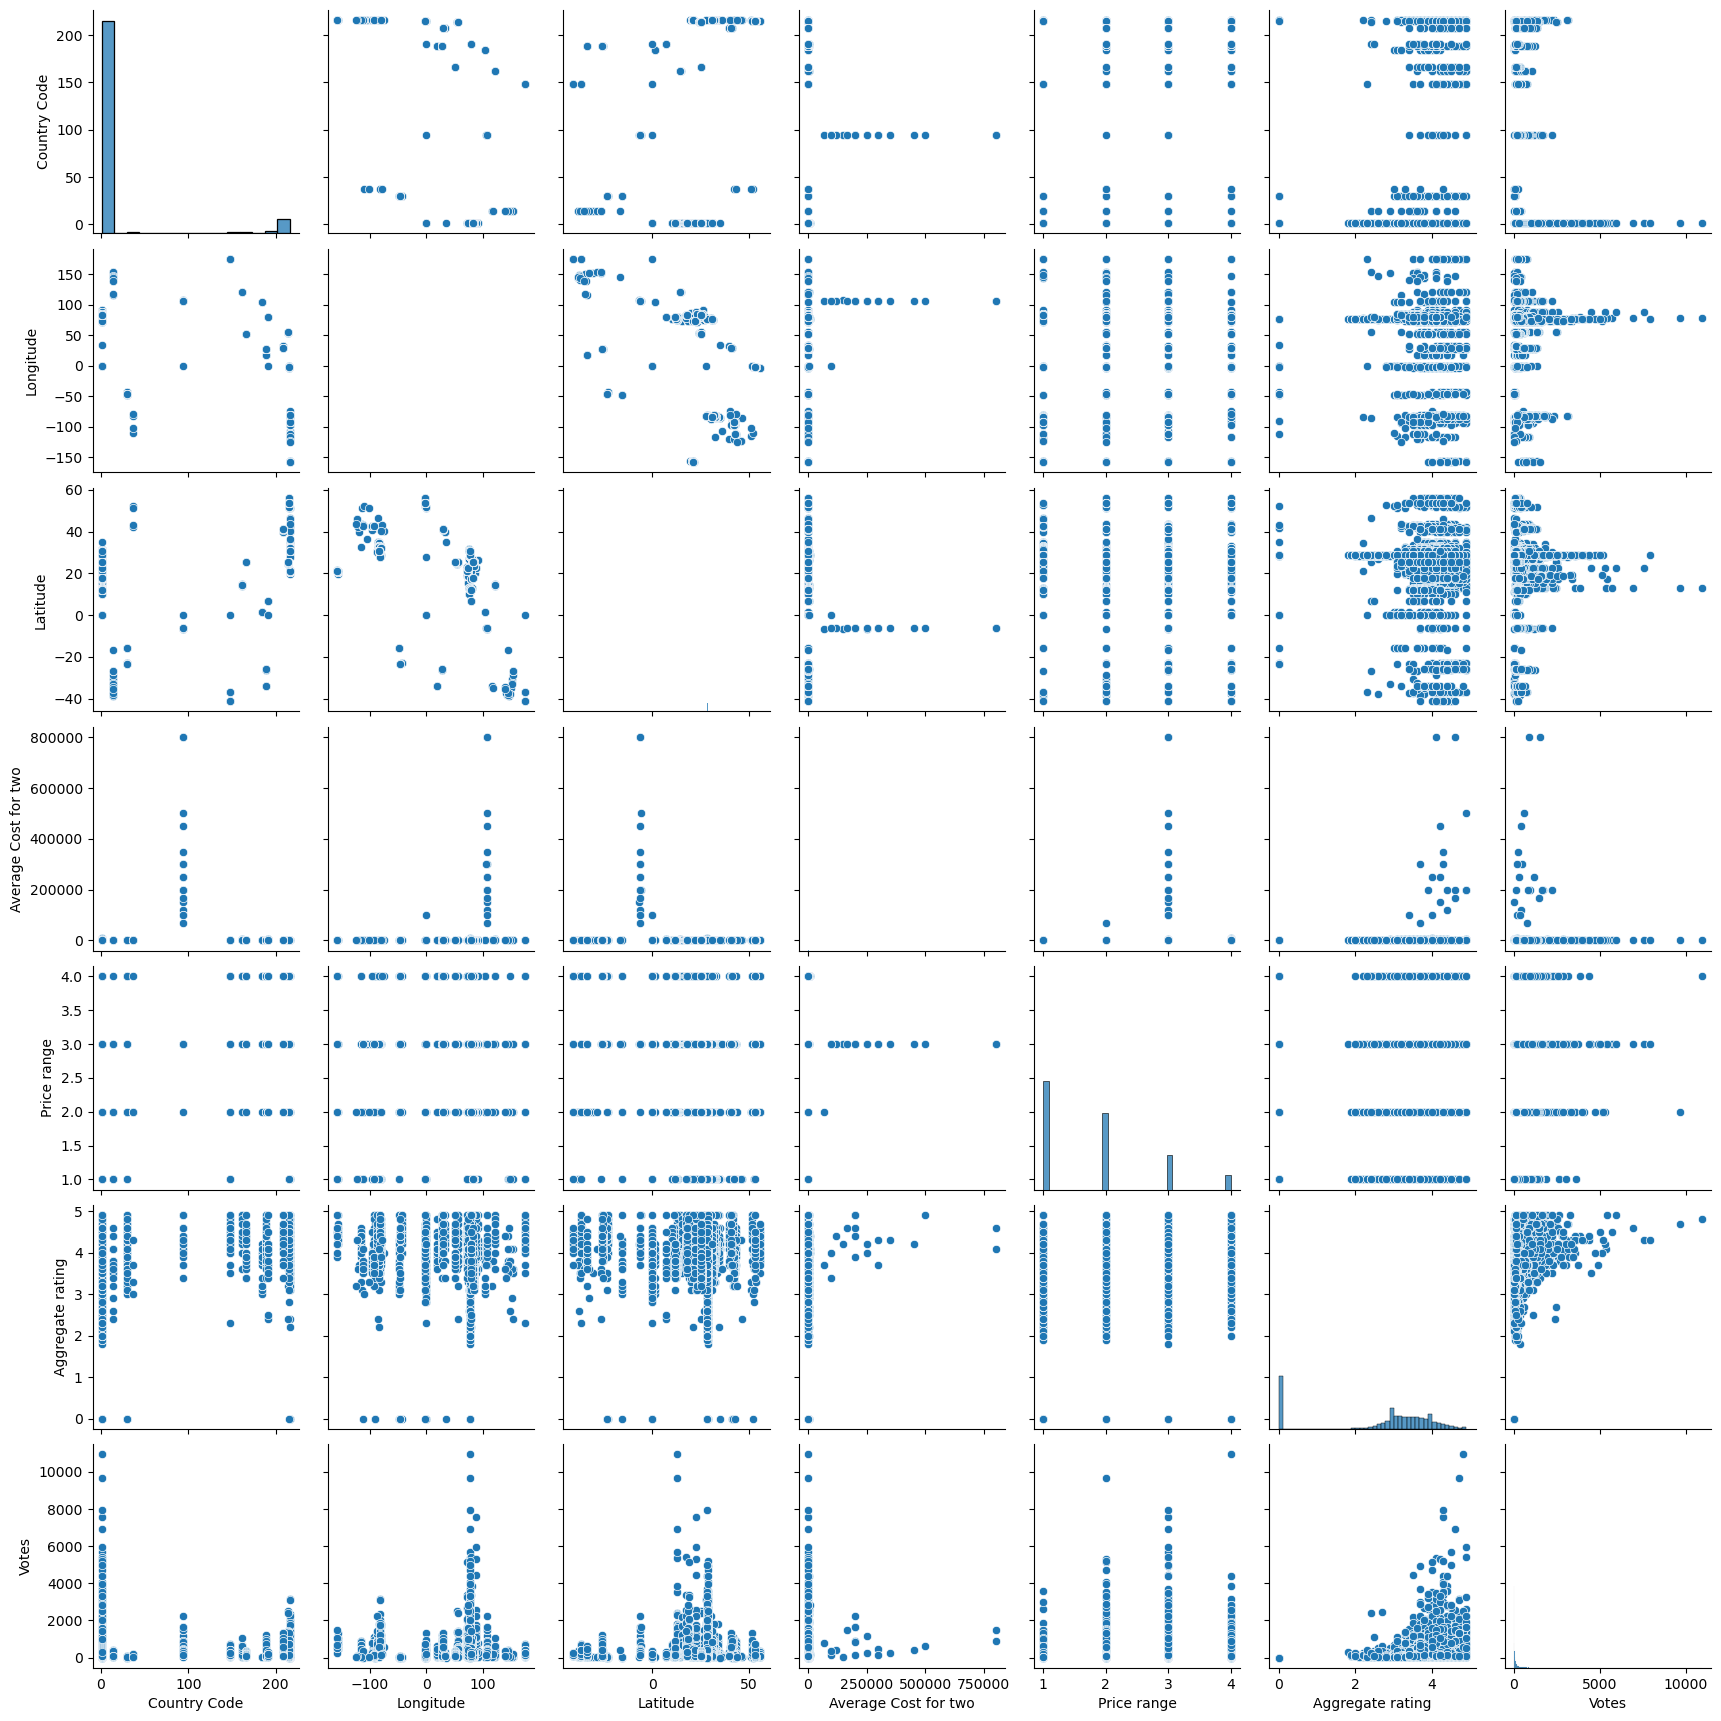

In [51]:
sns.pairplot(df)

- We can observe that price range 3 has highest count for Average Cost for two.
- Votes and Aggregate rating has positve correlation.
- We can observe that column latitude and longitude has no role in building the model prediction. Hence we can drop the columns.

Dropping Latitude and Longitude

In [52]:
df.drop('Longitude',axis=1,inplace=True)
df.drop('Latitude',axis=1,inplace=True)

Creating two copies of dataset 
- Average Cost for two
- Price range

In [53]:
df_avg_cost=df.copy()
df_price_range=df.copy()

### Predicting Price range

#### Checking for Outliers

In [54]:
num_columns=[column for column in df.columns if df[column].dtypes!='O' and column not in ['Price range','Country Code'] ]

Checking Outliers using boxplot

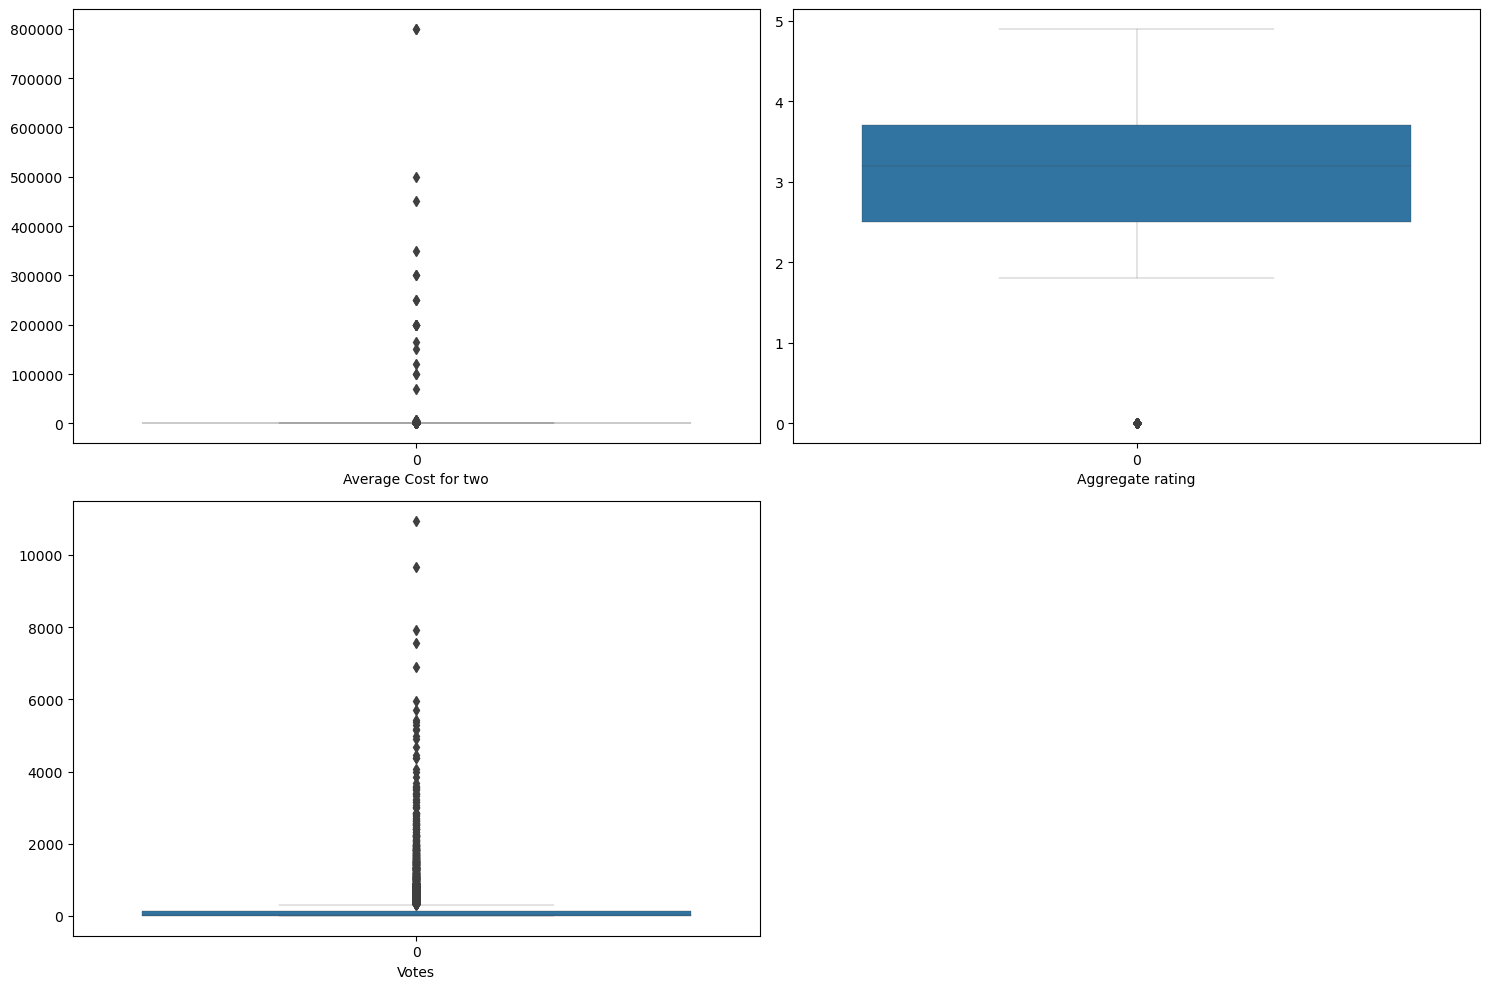

In [55]:
plt.figure(figsize=(15,10))
for index,column in enumerate(num_columns):
    if index<=len(num_columns):
        plt.subplot((len(num_columns)+1)//2,2,index+1)
        sns.boxplot(df_price_range[column],linewidth=.2)
        plt.xlabel(column)
        plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout()
plt.show()

- We can observe outliers present in all the 3 columns.

Checking outlier using zscore

In [56]:
data=df_price_range.copy()

In [57]:
def outliers_detection(data):
    z_score=np.abs(zscore(data[num_columns]))
    print(np.where(z_score>3))
    return z_score

In [58]:
z_score=outliers_detection(data)

(array([ 100,  349,  354,  355,  356,  362,  367,  424,  444,  488,  492,
        502,  503,  504,  506,  576,  582,  591,  635,  717,  718,  719,
        722,  726,  727,  730,  734,  784,  796,  798,  802,  804,  805,
        806,  808,  812,  815, 1135, 1138, 1154, 1226, 1238, 1239, 1242,
       1243, 1244, 1246, 1247, 1249, 1455, 1545, 1546, 1830, 1852, 1857,
       2291, 2293, 2295, 2298, 2302, 2305, 2329, 2335, 2393, 2395, 2397,
       2400, 2401, 2402, 2403, 2404, 2405, 2407, 2471, 2474, 2475, 2476,
       2479, 2481, 2483, 2486, 2490, 2626, 2871, 2996, 2999, 3004, 3007,
       3009, 3016, 3017, 3019, 3024, 3032, 3040, 3046, 3047, 3048, 3051,
       3059, 3066, 3071, 3074, 3076, 3084, 3085, 3086, 3092, 3098, 3101,
       3103, 3106, 3107, 3108, 3109, 3110, 3307, 3310, 3327, 3328, 3329,
       3429, 3579, 3580, 3590, 3592, 3596, 3967, 3974, 3975, 3977, 3983,
       3984, 3985, 3989, 4078, 4153, 4169, 4311, 4377, 4629, 4630, 4640,
       4664, 4998, 5017, 6135, 6308, 6525, 6650, 6

Removing outliers using zscore

In [59]:
def outliers_removal(z_score,data):
    data=data[(z_score<3).all(axis=1)]
    return data

In [60]:
data=outliers_removal(z_score,data)

Checking data loss after outliers removal

In [61]:
total_data_loss=df_price_range.shape[0]-data.shape[0]
total_data_loss

189

- Total rows of data lost is 189

Total percentage of data loss

In [62]:
total_data_loss_percentage=(total_data_loss*100)/df_price_range.shape[0]
total_data_loss_percentage

1.9807168308530707

- Total perentage of data lost is 1.98% which is within the acceptable range.

Checking outliers using IQR

In [63]:
Q1=df_price_range[num_columns].quantile(0.25)
Q3=df_price_range[num_columns].quantile(0.75)

IQR=Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (df_price_range[num_columns]>=lower_bound) & (df_price_range[num_columns]<=upper_bound)

df_no_outliers=df_price_range[bounds.all(axis=1)]

Checking data loss after outliers removal

In [64]:
total_data_loss_by_IQR=df_price_range.shape[0]-df_no_outliers.shape[0]
total_data_loss_by_IQR

3779

- Total rows of data lost is 3779

Checking data loss percentage after outliers removal using IQR

In [65]:
total_data_loss_percentage_by_IQR=(total_data_loss_by_IQR*100)/df_price_range.shape[0]
total_data_loss_percentage_by_IQR

39.60385663382939

- Total perentage of data lost is 39.60% which is very high.
- Hence we will use zscore to remove outliers

Removing outliers using zscore

In [66]:
df_price_range=data.reset_index(drop=True)

Checking the shape of the dataframe after outliers removal

In [67]:
df_price_range.shape

(9353, 21)

- Now the dataset has 9353 rows and 21 columns.

#### Checking skewness of numerical columns

In [68]:
df_price_range[num_columns].skew()

Average Cost for two    3.620465
Aggregate rating       -0.939831
Votes                   3.219845
dtype: float64

- We can observe skewness in all the 3 columns

Checking skewness by applying sqrt 

In [69]:
skewness_by_sqrt=np.sqrt(df_price_range[num_columns])
skewness_by_sqrt.skew()

Average Cost for two    1.228444
Aggregate rating       -1.191196
Votes                   1.451853
dtype: float64

Checking skewness by applying cbrt

In [70]:
skewness_by_cbrt=np.cbrt(df_price_range[num_columns])
skewness_by_cbrt.skew()

Average Cost for two    0.477734
Aggregate rating       -1.242807
Votes                   0.690512
dtype: float64

Checking skewness in Average Cost for two using log

In [71]:
skewness_check_average_cost=np.log(df_price_range['Average Cost for two']+1)
skewness_check_average_cost.skew()

-1.1487258184477467

Checking skewness in Votes using log

In [72]:
skewness_check_Votes=np.log(df_price_range['Votes']+1)
skewness_check_Votes.skew()

-0.12131746101438003

Checking skewness in Aggregate rating using boxcox

In [73]:
skewness_aggregate_rating_boxcox,_=boxcox(df_price_range['Aggregate rating']+1)
data=pd.DataFrame()
data['Aggregate rating']=skewness_aggregate_rating_boxcox
data['Aggregate rating'].skew()

-0.6156383986692692

Applying cbrt to Average Cost for two

In [74]:
df_price_range['Average Cost for two']=np.cbrt(df_price_range['Average Cost for two'])

Applying log to Votes

In [75]:
df_price_range['Votes']=skewness_check_Votes

Applying boxcox to Aggregate rating 

In [76]:
df_price_range['Aggregate rating']=skewness_aggregate_rating_boxcox

Checking the revised skewness

In [77]:
df_price_range[num_columns].skew()

Average Cost for two    0.477734
Aggregate rating       -0.615638
Votes                  -0.121317
dtype: float64

- Now the skewness is within the acceptable range

Feature selection

- We can drop the column Locality and country code. 

In [78]:
df_price_range.drop('Locality',axis=1,inplace=True)
df_price_range.drop('Country Code',axis=1,inplace=True)

#### Label Encoding of categorical columns

In [79]:
cat_columns_label_encoder=[column for column in df_price_range.columns if df_price_range[column].dtypes=='O' and column not in ('Cuisines1','Cuisines2','Cuisines3','Cuisines4','Cuisines5','Cuisines6','Cuisines7','Cuisines8')]
le=LabelEncoder()
df_price_range[cat_columns_label_encoder]=df_price_range[cat_columns_label_encoder].apply(lambda x:le.fit_transform(x))

In [80]:
cuisines_combined = pd.concat([df_price_range['Cuisines1'], df_price_range['Cuisines2'], df_price_range['Cuisines3'], 
                               df_price_range['Cuisines4'], df_price_range['Cuisines5'], df_price_range['Cuisines6'], 
                               df_price_range['Cuisines7'], df_price_range['Cuisines8']]).unique()
cuisines_mapping = {cuisine: i for i, cuisine in enumerate(cuisines_combined)}
for col in ['Cuisines1', 'Cuisines2', 'Cuisines3', 'Cuisines4', 'Cuisines5', 'Cuisines6', 'Cuisines7', 'Cuisines8']:
    df_price_range[col] = df_price_range[col].map(cuisines_mapping)

Checking the dataset

In [81]:
df_price_range

,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,Cuisines1,Cuisines2,Cuisines3,Cuisines4,Cuisines5,Cuisines6,Cuisines7,Cuisines8
0,70,10.322801,2,1,0,0,3,11.835379,1,5.752573,5,0,1,20,114,114,114,114,114
1,70,10.626586,2,1,0,0,3,10.733469,1,6.383507,5,1,114,114,114,114,114,114,114
2,72,15.874011,2,1,0,0,4,10.375971,5,5.602119,5,2,4,6,26,114,114,114,114
3,72,11.447142,2,0,0,0,4,12.212416,1,5.902633,5,1,27,114,114,114,114,114,114
4,72,11.447142,2,1,0,0,4,11.835379,1,5.438079,5,1,8,114,114,114,114,114,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,135,4.308869,8,0,0,0,3,9.333209,5,6.670766,10,54,114,114,114,114,114,114,114
9349,135,4.717694,8,0,0,0,3,9.675818,5,6.942157,10,111,110,9,114,114,114,114,114
9350,135,5.539658,8,0,0,0,4,8.013128,2,6.495266,10,10,111,114,114,114,114,114,114
9351,135,4.932424,8,0,0,0,4,8.995610,5,6.804615,10,113,114,114,114,114,114,114,114


- The dataset is encoded.

Analysing the dataset through correlation

<Axes: >

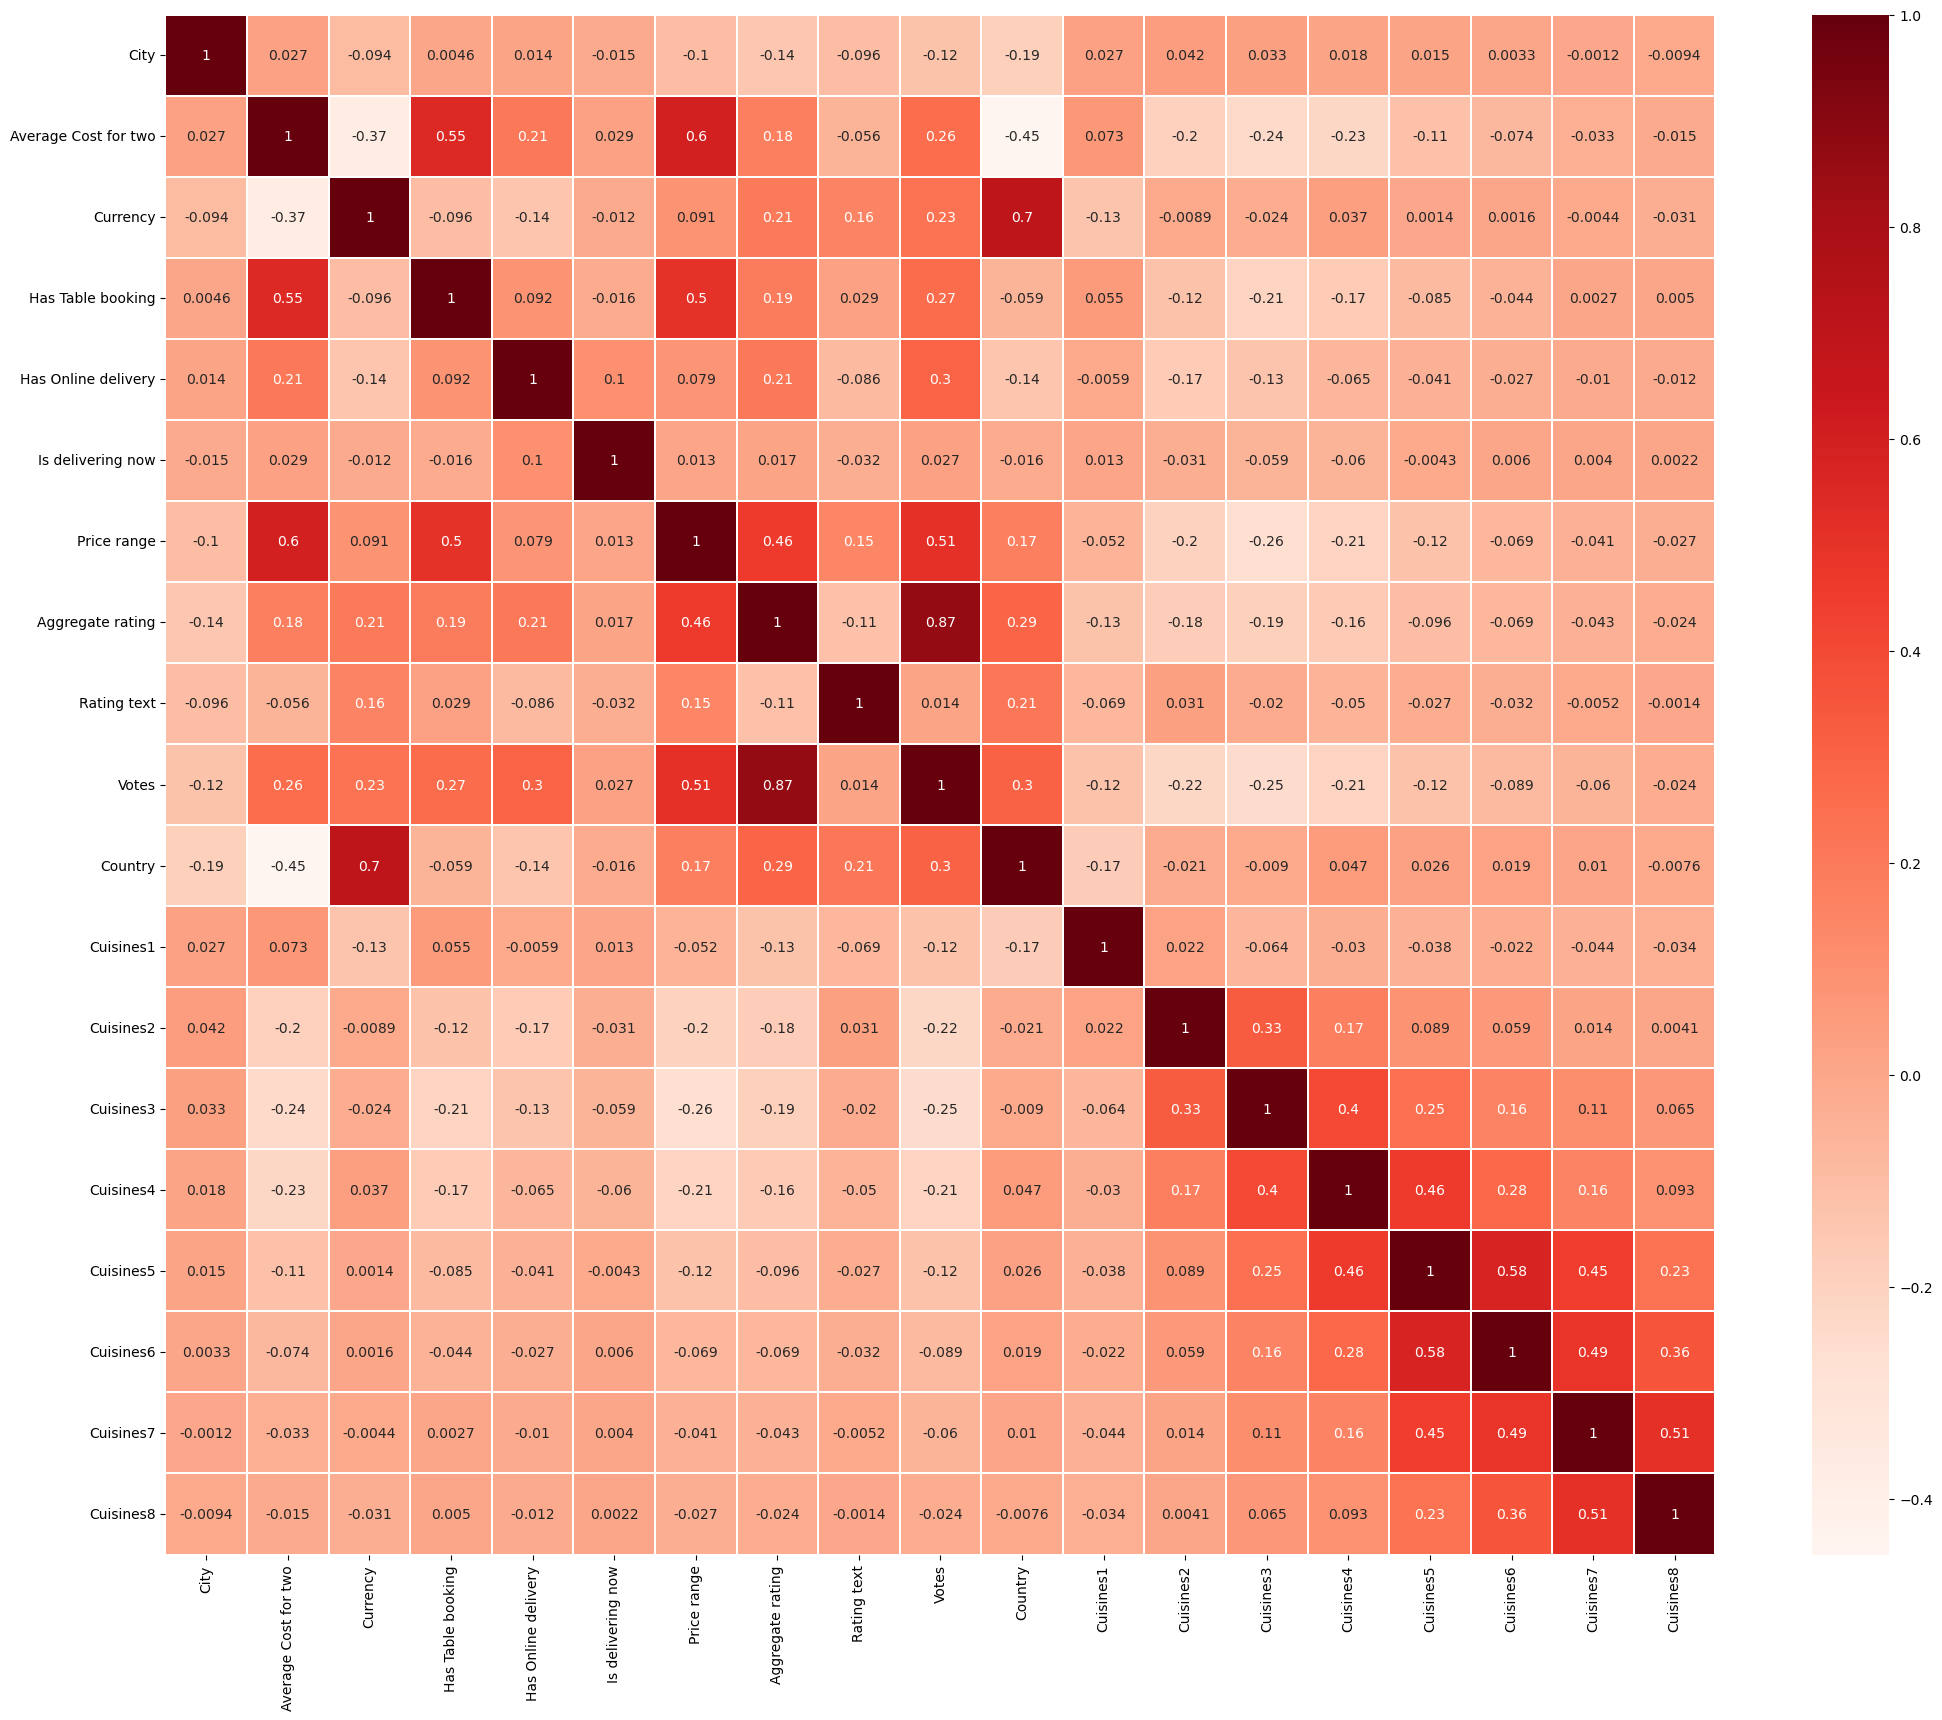

In [82]:
plt.figure(figsize=(25,20))
sns.heatmap(df_price_range.corr(),annot=True,fmt='.2g',linewidth=.1,cmap='Reds')

- We can observe moderate correlation among Price range and Votes, Has table booking and Average Cost for two
- High correlation can be observed among Votes and Aggregate rating.
- Moderate correlation can be observed amoung Cuisines5 and Cuisines6.
- Moderate to high correaltion can be observed between Currency and Country.
- Moderate correaltion can be observed between Average Cost for two and Price range and Average Cost for two and Has Table booking.

#### Scaling the dataset

Separating the target and independent columns

In [83]:
x=df_price_range.drop('Price range',axis=1)
y=df_price_range['Price range']

In [84]:
def StandardScaling(x):
    st=StandardScaler()
    x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
    return x

In [85]:
StandardScaling(x)

,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes,Country,Cuisines1,Cuisines2,Cuisines3,Cuisines4,Cuisines5,Cuisines6,Cuisines7,Cuisines8
0,-0.224228,1.159336,-1.753474,2.744769,-0.586528,-0.060402,1.864371,-0.451991,1.278227,0.576200,-1.427475,-1.337804,-1.741739,0.282930,0.158933,0.099915,0.066043,0.037095
1,-0.224228,1.288573,-1.753474,2.744769,-0.586528,-0.060402,1.537271,-0.451991,1.599725,0.576200,-1.389525,1.170708,0.571097,0.282930,0.158933,0.099915,0.066043,0.037095
2,-0.133718,3.520944,-1.753474,2.744769,-0.586528,-0.060402,1.431148,1.932034,1.201562,0.576200,-1.351574,-1.271206,-2.086204,-3.487141,0.158933,0.099915,0.066043,0.037095
3,-0.133718,1.637656,-1.753474,-0.364329,-0.586528,-0.060402,1.976293,-0.451991,1.354692,0.576200,-1.389525,-0.760624,0.571097,0.282930,0.158933,0.099915,0.066043,0.037095
4,-0.133718,1.637656,-1.753474,2.744769,-0.586528,-0.060402,1.864371,-0.451991,1.117975,0.576200,-1.389525,-1.182409,0.571097,0.282930,0.158933,0.099915,0.066043,0.037095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,2.717339,-1.399124,2.905685,-0.364329,-0.586528,-0.060402,1.121606,1.932034,1.746101,2.690604,0.621846,1.170708,0.571097,0.282930,0.158933,0.099915,0.066043,0.037095
9349,2.717339,-1.225201,2.905685,-0.364329,-0.586528,-0.060402,1.223309,1.932034,1.884390,2.690604,2.785018,1.081911,-2.012390,0.282930,0.158933,0.099915,0.066043,0.037095
9350,2.717339,-0.875519,2.905685,-0.364329,-0.586528,-0.060402,0.729743,0.144015,1.656673,2.690604,-1.047971,1.104110,0.571097,0.282930,0.158933,0.099915,0.066043,0.037095
9351,2.717339,-1.133850,2.905685,-0.364329,-0.586528,-0.060402,1.021391,1.932034,1.814305,2.690604,2.860918,1.170708,0.571097,0.282930,0.158933,0.099915,0.066043,0.037095


#### Checking the Variance Inflation Factor

In [86]:
def vif_cal(x):
    vif=pd.DataFrame()
    vif['Columns']=x.columns
    vif['VIF Factor']=[VIF(x.values,i) for i in range(x.shape[1])]
    return vif

In [87]:
vif_cal(x)

,Columns,VIF Factor
0,City,13.140514
1,Average Cost for two,26.150763
2,Currency,23.660294
3,Has Table booking,1.764624
4,Has Online delivery,1.637686
5,Is delivering now,1.022465
6,Aggregate rating,16.551329
7,Rating text,2.438646
8,Votes,19.249579
9,Country,9.162167


- High variance inflation is observed in columns Cuisines8, Cuisines7, Cuisines6, Cuisines5, Cuisines4, Average Cost for two, City, Currency, Votes, Aggregate rating.
- Hence we will drop Cuisines8 column.

Dropping Cuisines8 column

In [88]:
x.drop('Cuisines8',axis=1,inplace=True)

Checking VIF

In [89]:
vif_cal(x)

,Columns,VIF Factor
0,City,12.779537
1,Average Cost for two,24.531920
2,Currency,23.267154
3,Has Table booking,1.734220
4,Has Online delivery,1.637517
5,Is delivering now,1.022463
6,Aggregate rating,16.527666
7,Rating text,2.428662
8,Votes,19.249534
9,Country,9.133818


- High variance inflation is observed in columns Cuisines7, Cuisines6, Cuisines5, Cuisines4, Average Cost for two, City, Currency, Votes, Aggregate rating.
- Hence we will drop Cuisines7 column.

Dropping Cuisines7 column

In [90]:
x.drop('Cuisines7',axis=1,inplace=True)

Checking VIF

In [91]:
vif_cal(x)

,Columns,VIF Factor
0,City,12.395879
1,Average Cost for two,22.696535
2,Currency,22.687041
3,Has Table booking,1.721620
4,Has Online delivery,1.635037
5,Is delivering now,1.022462
6,Aggregate rating,16.446702
7,Rating text,2.411903
8,Votes,19.201776
9,Country,9.100615


- High variance inflation is observed in columns Cuisines6, Cuisines5, Cuisines4, Average Cost for two, City, Currency, Votes, Aggregate rating.
- Hence we will drop Cuisines6 column.

Dropping Cuisines6 column

In [92]:
x.drop('Cuisines6',axis=1,inplace=True)

Checking VIF

In [93]:
vif_cal(x)

,Columns,VIF Factor
0,City,11.800738
1,Average Cost for two,19.608806
2,Currency,21.741835
3,Has Table booking,1.693373
4,Has Online delivery,1.631916
5,Is delivering now,1.022257
6,Aggregate rating,16.359289
7,Rating text,2.401910
8,Votes,19.143571
9,Country,9.021767


- High variance inflation is observed in Cuisines5, Cuisines4, Average Cost for two, City, Currency, Votes, Aggregate rating.
- Hence we will drop Cuisines5 column.

Dropping Cuisines5 column

In [94]:
x.drop('Cuisines5',axis=1,inplace=True)

Checking VIF

In [95]:
vif_cal(x)

,Columns,VIF Factor
0,City,11.129518
1,Average Cost for two,16.432679
2,Currency,21.075672
3,Has Table booking,1.663118
4,Has Online delivery,1.629607
5,Is delivering now,1.020575
6,Aggregate rating,16.279024
7,Rating text,2.389545
8,Votes,19.074977
9,Country,8.896418


- High variance inflation is observed in Cuisines4, Average Cost for two, City, Currency, Votes, Aggregate rating.
- Hence we will drop Cuisines4 column.

Dropping Cuisines4 column

In [96]:
x.drop('Cuisines4',axis=1,inplace=True)

Checking VIF

In [97]:
vif_cal(x)

,Columns,VIF Factor
0,City,10.572417
1,Average Cost for two,14.613718
2,Currency,20.170104
3,Has Table booking,1.626039
4,Has Online delivery,1.615728
5,Is delivering now,1.019423
6,Aggregate rating,16.207529
7,Rating text,2.389517
8,Votes,18.817379
9,Country,8.732143


- High variance inflation is observed in Average Cost for two, Currency, Votes, Aggregate rating.
- Hence we will drop Currency column.

Dropping Currency column

In [98]:
x.drop('Currency',axis=1,inplace=True)

Checking VIF

In [99]:
vif_cal(x)

,Columns,VIF Factor
0,City,9.759784
1,Average Cost for two,13.518987
2,Has Table booking,1.573451
3,Has Online delivery,1.611968
4,Is delivering now,1.019351
5,Aggregate rating,16.207430
6,Rating text,2.379917
7,Votes,18.762839
8,Country,4.550320
9,Cuisines1,2.966540


- The column Aggregate rating, Average Cost for two and Votes exhibits a variance slightly higher than the acceptable range. However, due to its importance, we will retain it in the model.
- The variance inflation factor is slightly higher than the acceptable range. Not much multicollinearity is present in the dataset.

Imbalance dataset check

Checking value counts of Income

In [100]:
y.value_counts()

Price range
1    4431
2    3075
3    1294
4     553
Name: count, dtype: int64

- We can observe that the dataset is imbalanced. Hence we need to apply SMOTE to make the dataset balanced.

Applying SMOTE to make the dataset balance

In [101]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Verifying the value counts

In [102]:
y.value_counts()

Price range
3    4431
4    4431
2    4431
1    4431
Name: count, dtype: int64

- Now the dataset is balanced and ready for modelling

### Modelling

Evaluating the best random_state using ExtraTreesClassifier regression

In [103]:
def best_random_state(x,y):
    best_randomstate=0
    best_score=0
    
    etc=ExtraTreesClassifier()
    for rs in range (1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rs)
        etc.fit(x_train,y_train)
        prediction=etc.predict(x_test)
        score=accuracy_score(y_test,prediction)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('Accuracy score: {} and Random state: {}'.format(best_score, best_randomstate))

In [104]:
best_random_state(x,y)

Accuracy score: 0.972241029113067 and Random state: 62


Spliting dataset into train and test

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=62)

Logistic regression model

In [106]:
def logistic_regression(x_train,x_test,y_train,y_test):
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_pred=lr.predict(x_test)
    
    acc_lr=accuracy_score(y_test,lr_pred)
    print('The accuracy using Logistic regression is: {:4f}% '.format((acc_lr)*100))
    print(confusion_matrix(y_test,lr_pred))
    print(classification_report(y_test,lr_pred))
    
    return lr_pred, acc_lr

In [107]:
lr_pred, acc_lr=logistic_regression(x_train,x_test,y_train,y_test)

The accuracy using Logistic regression is: 55.340354% 
[[1030  192   67   76]
 [ 332  531  247  241]
 [  97  222  508  479]
 [ 114   88  220  874]]
              precision    recall  f1-score   support

           1       0.65      0.75      0.70      1365
           2       0.51      0.39      0.45      1351
           3       0.49      0.39      0.43      1306
           4       0.52      0.67      0.59      1296

    accuracy                           0.55      5318
   macro avg       0.54      0.55      0.54      5318
weighted avg       0.55      0.55      0.54      5318



Support Vector Classification

In [108]:
def support_vector(x_train,x_test,y_train,y_test):
    svc=SVC()
    svc.fit(x_train,y_train)
    svc_pred=svc.predict(x_test)
    acc_svc=accuracy_score(y_test,svc_pred)
    
    print('The accuracy using SVC is: {:4f}% '.format((acc_svc)*100))
    print(confusion_matrix(y_test,svc_pred))
    print(classification_report(y_test,svc_pred))
    
    return svc_pred, acc_svc

In [109]:
svc_pred, acc_svc=support_vector(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 60.718315% 
[[937 380  29  19]
 [285 788 200  78]
 [ 36 236 759 275]
 [ 15  42 494 745]]
              precision    recall  f1-score   support

           1       0.74      0.69      0.71      1365
           2       0.54      0.58      0.56      1351
           3       0.51      0.58      0.54      1306
           4       0.67      0.57      0.62      1296

    accuracy                           0.61      5318
   macro avg       0.62      0.61      0.61      5318
weighted avg       0.62      0.61      0.61      5318



Random Forest Classifier

In [110]:
def random_forest(x_train,x_test,y_train,y_test):
    
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    rfc_pred=rfc.predict(x_test)
    
    acc_rfc=accuracy_score(y_test,rfc_pred)
    print('The accuracy using Random Forest is: {:4f}% '.format((accuracy_score(y_test,rfc_pred))*100))
    print(confusion_matrix(y_test,rfc_pred))
    print(classification_report(y_test,rfc_pred))
    
    return rfc_pred,acc_rfc

In [111]:
rfc_pred,acc_rfc = random_forest(x_train,x_test,y_train,y_test)

The accuracy using Random Forest is: 97.480256% 
[[1355   10    0    0]
 [  12 1323   13    3]
 [   2   23 1238   43]
 [   0    1   27 1268]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1365
           2       0.97      0.98      0.98      1351
           3       0.97      0.95      0.96      1306
           4       0.96      0.98      0.97      1296

    accuracy                           0.97      5318
   macro avg       0.97      0.97      0.97      5318
weighted avg       0.97      0.97      0.97      5318



Adaboost Classifier

In [112]:
def adaboost(x_train,x_test,y_train,y_test):
    
    abc=AdaBoostClassifier()
    abc.fit(x_train,y_train)
    abc_pred=abc.predict(x_test)
    
    acc_abc=accuracy_score(y_test,abc_pred)
    print('The accuracy using Adaboost is: {:4f}% '.format((accuracy_score(y_test,abc_pred))*100))
    print(confusion_matrix(y_test,abc_pred))
    print(classification_report(y_test,abc_pred))
    
    return abc_pred, acc_abc

In [113]:
abc_pred, acc_abc = adaboost(x_train,x_test,y_train,y_test)

The accuracy using Adaboost is: 58.217375% 
[[1316   44    2    3]
 [  11 1220  108   12]
 [   2  812  405   87]
 [   1  705  435  155]]
              precision    recall  f1-score   support

           1       0.99      0.96      0.98      1365
           2       0.44      0.90      0.59      1351
           3       0.43      0.31      0.36      1306
           4       0.60      0.12      0.20      1296

    accuracy                           0.58      5318
   macro avg       0.61      0.57      0.53      5318
weighted avg       0.62      0.58      0.54      5318



Gradient Boost Classifier

In [114]:
def gradientboost(x_train,x_test,y_train,y_test):
    
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train,y_train)
    gbc_pred=gbc.predict(x_test)
    
    acc_gbc=accuracy_score(y_test,gbc_pred)
    print('The accuracy using Gradientboost is: {:4f}% '.format((accuracy_score(y_test,gbc_pred))*100))
    print(confusion_matrix(y_test,gbc_pred))
    print(classification_report(y_test,gbc_pred))
    
    return gbc_pred,acc_gbc

In [115]:
gbc_pred, acc_gbc = gradientboost(x_train,x_test,y_train,y_test)

The accuracy using Gradientboost is: 95.317789% 
[[1358    6    1    0]
 [  12 1314   16    9]
 [   2   38 1172   94]
 [   0    1   70 1225]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1365
           2       0.97      0.97      0.97      1351
           3       0.93      0.90      0.91      1306
           4       0.92      0.95      0.93      1296

    accuracy                           0.95      5318
   macro avg       0.95      0.95      0.95      5318
weighted avg       0.95      0.95      0.95      5318



Bagging classifier

In [116]:
def baggingclassifier(x_train,x_test,y_train,y_test):
    
    bc=BaggingClassifier()
    bc.fit(x_train,y_train)
    bc_pred=bc.predict(x_test)
    
    acc_bc=accuracy_score(y_test,bc_pred)
    print('The accuracy using Bagging classfier is: {:4f}% '.format((accuracy_score(y_test,bc_pred))*100))
    print(confusion_matrix(y_test,bc_pred))
    print(classification_report(y_test,bc_pred))
    
    return bc_pred,acc_bc

In [117]:
bc_pred, acc_bc = baggingclassifier(x_train,x_test,y_train,y_test)

The accuracy using Bagging classfier is: 96.916134% 
[[1357    5    2    1]
 [   6 1330   13    2]
 [   6   24 1217   59]
 [   2    3   41 1250]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1365
           2       0.98      0.98      0.98      1351
           3       0.96      0.93      0.94      1306
           4       0.95      0.96      0.96      1296

    accuracy                           0.97      5318
   macro avg       0.97      0.97      0.97      5318
weighted avg       0.97      0.97      0.97      5318



ExtraTree classifier

In [118]:
def extratree_classifier(x_train,x_test,y_train,y_test):
    
    etc=ExtraTreesClassifier()
    etc.fit(x_train,y_train)
    etc_pred=etc.predict(x_test)
    
    acc_etc=accuracy_score(y_test,etc_pred)
    print('The accuracy using Extratrees is: {:4f}% '.format((accuracy_score(y_test,etc_pred))*100))
    print(confusion_matrix(y_test,etc_pred))
    print(classification_report(y_test,etc_pred))
    
    return etc_pred, acc_etc

In [119]:
etc_pred, acc_etc=extratree_classifier(x_train,x_test,y_train,y_test)

The accuracy using Extratrees is: 97.028958% 
[[1337   26    2    0]
 [  11 1312   25    3]
 [   1   26 1238   41]
 [   0    1   22 1273]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.99      1365
           2       0.96      0.97      0.97      1351
           3       0.96      0.95      0.95      1306
           4       0.97      0.98      0.97      1296

    accuracy                           0.97      5318
   macro avg       0.97      0.97      0.97      5318
weighted avg       0.97      0.97      0.97      5318



DecisionTree classifier

In [120]:
def decisiontree_classifier(x_train,x_test,y_train,y_test):
    
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    dtc_pred=dtc.predict(x_test)
    
    acc_dtc=accuracy_score(y_test,dtc_pred)
    print('The accuracy using Decisiontree is: {:4f}% '.format((accuracy_score(y_test,dtc_pred))*100))
    print(confusion_matrix(y_test,dtc_pred))
    print(classification_report(y_test,dtc_pred))
    
    return dtc_pred, acc_dtc

In [121]:
dtc_pred, acc_dtc = decisiontree_classifier(x_train,x_test,y_train,y_test)

The accuracy using Decisiontree is: 95.637458% 
[[1352    8    4    1]
 [   4 1324   19    4]
 [   6   22 1193   85]
 [   3    4   72 1217]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1365
           2       0.97      0.98      0.98      1351
           3       0.93      0.91      0.92      1306
           4       0.93      0.94      0.94      1296

    accuracy                           0.96      5318
   macro avg       0.96      0.96      0.96      5318
weighted avg       0.96      0.96      0.96      5318



KNN classifier

In [122]:
def knn(x_train,x_test,y_train,y_test):
    
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    
    acc_knn=accuracy_score(y_test,knn_pred)
    print('The accuracy using KNN is: {:4f}% '.format((accuracy_score(y_test,knn_pred))*100))
    print(confusion_matrix(y_test,knn_pred))
    print(classification_report(y_test,knn_pred))
    
    return knn_pred, acc_knn

In [123]:
knn_pred, acc_knn = knn(x_train,x_test,y_train,y_test)

The accuracy using KNN is: 84.204588% 
[[1115  201   40    9]
 [ 111 1075  137   28]
 [  17  116 1076   97]
 [   0   23   61 1212]]
              precision    recall  f1-score   support

           1       0.90      0.82      0.86      1365
           2       0.76      0.80      0.78      1351
           3       0.82      0.82      0.82      1306
           4       0.90      0.94      0.92      1296

    accuracy                           0.84      5318
   macro avg       0.84      0.84      0.84      5318
weighted avg       0.84      0.84      0.84      5318



Ridge Classifier

In [124]:
def ridge(x_train,x_test,y_train,y_test):
    
    rd=RidgeClassifier()
    rd.fit(x_train,y_train)
    rd_pred=rd.predict(x_test)
    
    acc_rd=accuracy_score(y_test,rd_pred)
    print('The accuracy using Ridge is: {:4f}% '.format((accuracy_score(y_test,rd_pred))*100))
    print(confusion_matrix(y_test,rd_pred))
    print(classification_report(y_test,rd_pred))
    
    return rd_pred, acc_rd

In [125]:
rd_pred, acc_rd = ridge(x_train,x_test,y_train,y_test)

The accuracy using Ridge is: 61.790147% 
[[1122  194   45    4]
 [ 515  542  196   98]
 [  80  129  665  432]
 [ 132    6  201  957]]
              precision    recall  f1-score   support

           1       0.61      0.82      0.70      1365
           2       0.62      0.40      0.49      1351
           3       0.60      0.51      0.55      1306
           4       0.64      0.74      0.69      1296

    accuracy                           0.62      5318
   macro avg       0.62      0.62      0.61      5318
weighted avg       0.62      0.62      0.61      5318



#### Cross Validating the models¶

In [126]:
def cross_validation(x,y,*args):
    
    # Cross validation for Logistic Regression
    lr=LogisticRegression()
    lr_score=cross_val_score(lr,x,y)
    diff_lr=accuracy_score(y_test,lr_pred)-lr_score.mean()
    
    # Cross SVC
    svc=SVC()
    svc_score=cross_val_score(svc,x,y)
    diff_svc=accuracy_score(y_test,svc_pred)-svc_score.mean()
    
    # Cross validation for RandomForestClassifier
    rfc=RandomForestClassifier()
    rfc_score=cross_val_score(rfc,x,y)
    diff_rfc=accuracy_score(y_test,rfc_pred)-rfc_score.mean()
    
    # Cross validation for AdaBoostClassifier
    abc=AdaBoostClassifier()
    abc_score=cross_val_score(abc,x,y)
    diff_abc=accuracy_score(y_test,abc_pred)-abc_score.mean()
    
    # Cross validation for GradientBoostingClassifier
    gbc=GradientBoostingClassifier()
    gbc_score=cross_val_score(gbc,x,y)
    diff_gbc=accuracy_score(y_test,gbc_pred)-gbc_score.mean()
    
    # Cross validation for BaggingClassifier
    bc=BaggingClassifier()
    bc_score=cross_val_score(bc,x,y)
    diff_bc=accuracy_score(y_test,bc_pred)-bc_score.mean()
    
    # Cross validation for ExtraTreesClassifier
    etc=ExtraTreesClassifier()
    etc_score=cross_val_score(etc,x,y)
    diff_etc=accuracy_score(y_test,etc_pred)-etc_score.mean()
    
    # Cross validation for DecisionTreeClassifier
    dtc=DecisionTreeClassifier()
    dtc_score=cross_val_score(dtc,x,y)
    diff_dtc=accuracy_score(y_test,dtc_pred)-dtc_score.mean()
    
    # Cross validation for KNeighborsClassifier
    knn=KNeighborsClassifier()
    knn_score=cross_val_score(knn,x,y)
    diff_knn=accuracy_score(y_test,knn_pred)-knn_score.mean()
    
    # Cross validation for RidgeClassifier
    rd=RidgeClassifier()
    rd_score=cross_val_score(rd,x,y)
    diff_rd=accuracy_score(y_test,rd_pred)-rd_score.mean()
    
    df=pd.DataFrame({'Classification Name':['Logistic Regression',
                                        'SVC',
                                        'RandomForestClassifier',
                                        'AdaBoostClassifier',
                                        'GradientBoostingClassifier',
                                        'BaggingClassifier',
                                        'ExtraTreesClassifier',
                                        'DecisionTreeClassifier',
                                        'KNeighborsClassifier',
                                        'RidgeClassfier'],
                     'Classification Score':[acc_lr, acc_svc, acc_rfc, acc_abc, acc_gbc, acc_bc, acc_etc, acc_dtc, acc_knn,acc_rd],
                     'Cross Val Score':[lr_score.mean(), 
                                        svc_score.mean(), 
                                        rfc_score.mean(), 
                                        abc_score.mean(), 
                                        gbc_score.mean(), 
                                        bc_score.mean(), 
                                        etc_score.mean(), 
                                        dtc_score.mean(), 
                                        knn_score.mean(),
                                        rd_score.mean()],
                     'Difference': [diff_lr, diff_svc, diff_rfc, diff_abc, diff_gbc, diff_bc, diff_etc, diff_dtc, diff_knn, diff_rd]
                    })
    return df

In [127]:
model_pred=[lr_pred, svc_pred, rfc_pred, abc_pred, gbc_pred, bc_pred, etc_pred, dtc_pred, knn_pred,rd_pred]

In [128]:
cross_validation(x,y,model_pred)

,Classification Name,Classification Score,Cross Val Score,Difference
0,Logistic Regression,0.553404,0.540456,0.012948
1,SVC,0.607183,0.589316,0.017867
2,RandomForestClassifier,0.974803,0.927558,0.047245
3,AdaBoostClassifier,0.582174,0.635692,-0.053518
4,GradientBoostingClassifier,0.953178,0.926711,0.026467
5,BaggingClassifier,0.969161,0.924962,0.044199
6,ExtraTreesClassifier,0.970290,0.916612,0.053678
7,DecisionTreeClassifier,0.956375,0.907134,0.049241
8,KNeighborsClassifier,0.842046,0.823632,0.018413
9,RidgeClassfier,0.617901,0.611544,0.006357


- GradientBoostingClassifier has high classification score (0.953178) and a high cross-validation score (0.926711) with a moderate difference (0.026467), indicating good performance and generalization.
- Hence GradientBoostingClassifier is the best model due to its overall performance.

#### Hyper parameter tuning

In [129]:
parameters={'random_state': [42,45,62],
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 4, 5],
            'criterion': ['friedman_mse', 'squared_error'],
}

In [130]:
gridsearch_cv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'random_state': [42, 45, 62]})

Checking the best paramenters

In [131]:
gridsearch_cv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'random_state': 62}

#### Creating the final model

In [132]:
def final_model(x_train,x_test,y_train,y_test):
    final_model_gradientboost=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.1,n_estimators=200,max_depth=5,random_state=62)
    final_model_gradientboost.fit(x_train,y_train)
    prediction=final_model_gradientboost.predict(x_test)
    accuracy=accuracy_score(y_test,prediction)
    
    print('The final accuracy is: {:.2f}%'.format((accuracy)*100))
    
    return final_model_gradientboost, prediction, accuracy

In [133]:
final_model, prediction, accuracy=final_model(x_train,x_test,y_train,y_test)

The final accuracy is: 97.24%


#### Saving the Model

In [134]:
file='Insurance_Fraud_Detection.pkl'
pickle.dump(final_model,open(file,'wb'))

### Predicting Average Cost for two

#### Checking for Outliers

In [135]:
num_columns=[column for column in df_avg_cost.columns if df_avg_cost[column].dtypes!='O' and column not in ['Average Cost for two','Country Code']]

Checking outliers using boxplot

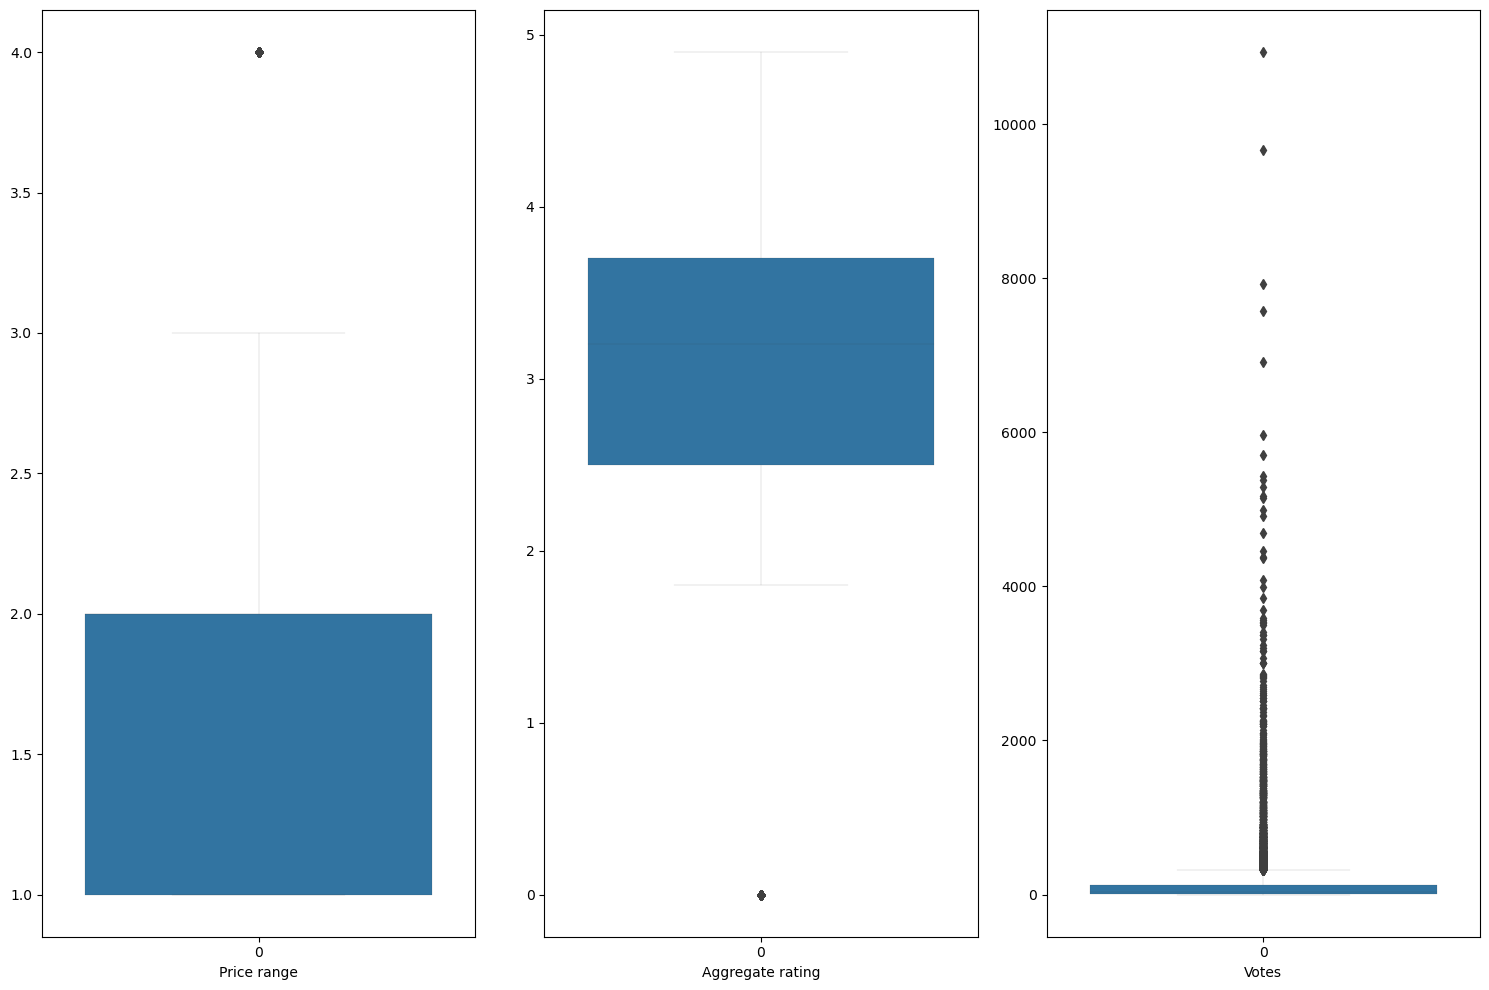

In [137]:
plt.figure(figsize=(15,10))
for index,column in enumerate(num_columns):
    if index<=len(num_columns):
        plt.subplot((len(num_columns)+2)//3,3,index+1)
        sns.boxplot(df_avg_cost[column],linewidth=.1)
        plt.xlabel(column)
plt.tight_layout()
plt.show()

- We can observe outliers in votes column

Checking outlier using zscore

In [140]:
def outliers_check(df_avg_cost):
    z_score=np.abs(zscore(df_avg_cost[num_columns]))
    print(np.where(z_score>3))
    return z_score

In [141]:
z_score=outliers_check(df_avg_cost)

(array([ 100,  349,  354,  355,  356,  362,  367,  424,  444,  488,  492,
        502,  503,  504,  506,  576,  582,  591,  635,  717,  718,  719,
        722,  726,  727,  730,  734,  784,  796,  798,  802,  804,  805,
        806,  808,  812,  815, 1135, 1138, 1154, 1226, 1238, 1239, 1242,
       1243, 1244, 1246, 1247, 1249, 1455, 1545, 1546, 1830, 1852, 1857,
       2291, 2293, 2295, 2298, 2302, 2305, 2329, 2335, 2393, 2395, 2397,
       2400, 2401, 2402, 2403, 2404, 2405, 2407, 2471, 2474, 2475, 2476,
       2479, 2481, 2483, 2486, 2490, 2626, 2871, 2996, 2999, 3004, 3007,
       3009, 3016, 3017, 3019, 3024, 3032, 3040, 3046, 3047, 3048, 3051,
       3059, 3066, 3071, 3074, 3076, 3084, 3085, 3086, 3092, 3098, 3101,
       3103, 3106, 3107, 3108, 3109, 3110, 3307, 3310, 3327, 3328, 3329,
       3429, 3579, 3580, 3590, 3592, 3596, 3967, 3974, 3975, 3977, 3983,
       3984, 3985, 3989, 4078, 4153, 4169, 4311, 4377, 4629, 4630, 4640,
       4664, 4998, 5017, 6135, 6308, 6525, 6650, 6

Creating a copy of dataframe

In [142]:
data=df_avg_cost.copy()

Removing outliers

In [143]:
def outliers_removal(z_score,data):
    data=data[(z_score<3).all(axis=1)]
    return data

In [144]:
data=outliers_removal(z_score,data)

Checking total data loss

In [145]:
total_data_loss=df_avg_cost.shape[0]-data.shape[0]
total_data_loss

173

Total percentage of data loss

In [146]:
total_data_loss_percentage=total_data_loss*100/df_avg_cost.shape[0]
total_data_loss_percentage

1.8130370991406415

- Total perentage of data lost is 1.81% which is within the acceptable range.

Checking outliers using IQR

In [148]:
Q1=df_avg_cost[num_columns].quantile(0.25)
Q3=df_avg_cost[num_columns].quantile(0.75)

IQR=Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bounds = (df_avg_cost[num_columns]>=lower_bound) & (df_avg_cost[num_columns]<=upper_bound)

df_no_outliers=df_avg_cost[bounds.all(axis=1)]

Checking data loss after outliers removal

In [149]:
total_data_loss_by_IQR=df_avg_cost.shape[0]-df_no_outliers.shape[0]
total_data_loss_by_IQR

3674

Checking data loss percentage after outliers removal using IQR

In [150]:
total_data_loss_percentage_by_IQR=(total_data_loss_by_IQR*100)/df_avg_cost.shape[0]
total_data_loss_percentage_by_IQR

38.50345839446657

- Total data loss is 38.50 percent which is very high.
- Hence we will apply zscore

Removing outliers using zscore

In [153]:
df_avg_cost=data.reset_index(drop=True)

In [154]:
df_avg_cost.shape

(9369, 21)

- Now the dataset has 9369 rows and 21 columns.

#### Checking skewness

In [155]:
df_avg_cost[num_columns].skew()

Price range         0.927956
Aggregate rating   -0.941105
Votes               3.202563
dtype: float64

In [156]:
skewness_by_sqrt=np.sqrt(df_avg_cost[num_columns])
skewness_by_sqrt.skew()

Price range         0.617283
Aggregate rating   -1.193420
Votes               1.447762
dtype: float64

In [157]:
skewness_by_cbrt=np.cbrt(df_avg_cost[num_columns])
skewness_by_cbrt.skew()

Price range         0.526830
Aggregate rating   -1.245253
Votes               0.689385
dtype: float64

Applying cbrt on Price range and Votes

In [158]:
df_avg_cost['Price range']=np.cbrt(df_avg_cost['Price range'])
df_avg_cost['Votes']=np.cbrt(df_avg_cost['Votes'])

Feature selection

We can drop the column Locality and country code.

In [159]:
df_avg_cost.drop('Locality',axis=1,inplace=True)
df_avg_cost.drop('Country Code',axis=1,inplace=True)

#### Label Encoding of categorical columns

In [160]:
cat_columns_label_encoder=[column for column in df_avg_cost.columns if df_avg_cost[column].dtypes=='O' and column not in ('Cuisines1','Cuisines2','Cuisines3','Cuisines4','Cuisines5','Cuisines6','Cuisines7','Cuisines8')]
le=LabelEncoder()
df_avg_cost[cat_columns_label_encoder]=df_avg_cost[cat_columns_label_encoder].apply(lambda x:le.fit_transform(x))

In [161]:
cuisines_combined = pd.concat([df_avg_cost['Cuisines1'], df_avg_cost['Cuisines2'], df_avg_cost['Cuisines3'], 
                               df_avg_cost['Cuisines4'], df_avg_cost['Cuisines5'], df_avg_cost['Cuisines6'], 
                               df_avg_cost['Cuisines7'], df_avg_cost['Cuisines8']]).unique()
cuisines_mapping = {cuisine: i for i, cuisine in enumerate(cuisines_combined)}
for column in ['Cuisines1', 'Cuisines2', 'Cuisines3', 'Cuisines4', 'Cuisines5', 'Cuisines6', 'Cuisines7', 'Cuisines8']:
    df_avg_cost[column] = df_avg_cost[column].map(cuisines_mapping)

Checking the dataset

In [162]:
df_avg_cost

,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country,Cuisines1,Cuisines2,Cuisines3,Cuisines4,Cuisines5,Cuisines6,Cuisines7,Cuisines8
0,73,1100,2,1,0,0,1.442250,4.8,1,6.796884,6,0,1,20,116,116,116,116,116
1,73,1200,2,1,0,0,1.442250,4.5,1,8.391942,6,1,116,116,116,116,116,116,116
2,75,4000,2,1,0,0,1.587401,4.4,5,6.463304,6,2,4,6,26,116,116,116,116
3,75,1500,2,0,0,0,1.587401,4.9,1,7.146569,6,1,27,116,116,116,116,116,116
4,75,1500,2,1,0,0,1.587401,4.8,1,6.118033,6,1,8,116,116,116,116,116,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364,139,80,9,0,0,0,1.442250,4.1,5,9.236528,11,54,116,116,116,116,116,116,116
9365,139,105,9,0,0,0,1.442250,4.2,5,10.112073,11,113,112,9,116,116,116,116,116
9366,139,170,9,0,0,0,1.587401,3.7,2,8.710983,11,10,113,116,116,116,116,116,116
9367,139,120,9,0,0,0,1.587401,4.0,5,9.658468,11,115,116,116,116,116,116,116,116


#### Scaling the dataset

Separating the target and independent columns

In [163]:
x_p_range=df_avg_cost.drop('Price range',axis=1)
y_p_range=df_avg_cost['Price range']

In [164]:
def StandardScaling(x_p_range):
    st=StandardScaler()
    x_p_range=pd.DataFrame(st.fit_transform(x_p_range),columns=x_p_range.columns)
    return x_p_range

In [165]:
StandardScaling(x_p_range)

,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes,Country,Cuisines1,Cuisines2,Cuisines3,Cuisines4,Cuisines5,Cuisines6,Cuisines7,Cuisines8
0,-0.204891,0.004979,-2.405001,2.747427,-0.585855,-0.060351,1.428431,-0.453169,1.369873,0.870188,-1.424799,-1.328829,-1.741991,0.283918,0.159546,0.100756,0.066034,0.037159
1,-0.204891,0.012407,-2.405001,2.747427,-0.585855,-0.060351,1.230355,-0.453169,2.022554,0.870188,-1.386902,1.176792,0.572946,0.283918,0.159546,0.100756,0.066034,0.037159
2,-0.116770,0.220387,-2.405001,2.747427,-0.585855,-0.060351,1.164330,1.928399,1.233375,0.870188,-1.349005,-1.263465,-2.079585,-3.491020,0.159546,0.100756,0.066034,0.037159
3,-0.116770,0.034690,-2.405001,-0.363977,-0.585855,-0.060351,1.494456,-0.453169,1.512960,0.870188,-1.386902,-0.762341,0.572946,0.283918,0.159546,0.100756,0.066034,0.037159
4,-0.116770,0.034690,-2.405001,2.747427,-0.585855,-0.060351,1.428431,-0.453169,1.092094,0.870188,-1.386902,-1.176313,0.572946,0.283918,0.159546,0.100756,0.066034,0.037159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364,2.703100,-0.070785,2.802923,-0.363977,-0.585855,-0.060351,0.966255,1.928399,2.368149,2.778076,0.621649,1.176792,0.572946,0.283918,0.159546,0.100756,0.066034,0.037159
9365,2.703100,-0.068928,2.802923,-0.363977,-0.585855,-0.060351,1.032280,1.928399,2.726413,2.778076,2.857583,1.089640,-2.007244,0.283918,0.159546,0.100756,0.066034,0.037159
9366,2.703100,-0.064100,2.802923,-0.363977,-0.585855,-0.060351,0.702154,0.142223,2.153102,2.778076,-1.045827,1.111428,0.572946,0.283918,0.159546,0.100756,0.066034,0.037159
9367,2.703100,-0.067814,2.802923,-0.363977,-0.585855,-0.060351,0.900230,1.928399,2.540803,2.778076,2.933377,1.176792,0.572946,0.283918,0.159546,0.100756,0.066034,0.037159


#### Checking the Variance Inflation Factor

In [166]:
def vif_cal(x_p_range):
    vif=pd.DataFrame()
    vif['Columns']=x_p_range.columns
    vif['VIF Factor']=[VIF(x_p_range.values,i) for i in range(x_p_range.shape[1])]
    return vif

In [167]:
vif_cal(x_p_range)

,Columns,VIF Factor
0,City,13.340457
1,Average Cost for two,1.019070
2,Currency,27.409393
3,Has Table booking,1.316717
4,Has Online delivery,1.585682
5,Is delivering now,1.022048
6,Aggregate rating,12.236879
7,Rating text,2.873870
8,Votes,9.951991
9,Country,5.988556


x_p_range.drop('Cuisines8',axis=1,inplace=True)
x_p_range.drop('Cuisines7',axis=1,inplace=True)
x_p_range.drop('Cuisines6',axis=1,inplace=True)
x_p_range.drop('Cuisines5',axis=1,inplace=True)
x_p_range.drop('Cuisines4',axis=1,inplace=True)

#### Modelling

Calculating best random state and score

In [ ]:
def random_state_cal(x,y):
    best_randomstate = None
    best_score = 0
    
    for rs in range(1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=rs)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('R2 Score :{} Random state :{}'.format(best_score,best_randomstate))

In [ ]:
random_state_cal(x_p_range,y_p_range)

Applying train_test_split with test_size=.30 and random_state=